<a href="https://colab.research.google.com/github/MarioHenriqueUFAL/Projetos-de-Analise-de-Dados-Descritiva/blob/main/Analise_de_Dados_de_RH/Analise_Descritiva_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação das Bibliotecas

Todas as bibliotecas utilizadas no presente projeto estão importadas na célula abaixo.

In [ ]:
import pandas as pd #para manipulação de tabelas
import matplotlib.pyplot as plt #visualização de gráficos
import seaborn as sns #visualização de gráficos
import numpy as np #biblioteca para cálculos numéricos
from scipy import stats #biblioteca de estatística

# Carregamento da Base de Dados e Tratamento dos Dados

O primeiro passo no tratamento de uma base de dados envolve um exame cuidado para identificar quais atributos são relevantes para a análise do negócio. Este processo é essencial para determinar quais dados podem nos fornecer insighta valiosos.

Essa análise inicial da base de dados inclui a identificação dos tipos de variáveis presentes em cada coluna. Os dados podem ser encontrados como dados numéricos, data, categóricos, etc. Essa identificação é importante para entender como esses dados podem ser manipulados e analisados posteriormente.

Em resumo, a análise inicial é um passo crucial que orienta todo o restante do processo de análise de dados.

In [ ]:
df = pd.read_csv('/content/DatasetRH.csv')
df.head(10)

,Id_Funcionario,Idade,Genero,Estado Civil,Departamento,Funcao,Viagem,Valor Diaria,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,...,Numero_Empresas_Anteriores,Disponivel_Hora_Extra,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
0,1,41,Feminino,Solteiro,Data Science,Cientista de Dados,Viaja Raramente,1102,3,4,...,8,S,11,3,8,0,6,4,0,5
1,2,49,Masculino,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,279,2,2,...,1,N,23,4,10,3,10,7,1,7
2,4,37,Masculino,Solteiro,Data Science,Analista de Dados,Viaja Raramente,1373,2,3,...,6,S,15,3,7,3,0,0,0,0
3,5,33,Feminino,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,1392,3,3,...,1,S,11,3,8,3,8,7,3,0
4,7,27,Masculino,Casado,Data Science,Analista de Dados,Viaja Raramente,591,3,2,...,9,N,12,3,6,3,2,2,2,2
5,8,32,Masculino,Solteiro,Data Science,Analista de Dados,Viaja Frequentemente,1005,3,4,...,0,N,13,3,8,2,7,7,3,6
6,10,59,Feminino,Casado,Data Science,Analista de Dados,Viaja Raramente,1324,4,1,...,4,S,20,4,12,3,1,0,0,0
7,11,30,Masculino,Divorciado,Data Science,Analista de Dados,Viaja Raramente,1358,3,3,...,1,N,22,4,1,2,1,0,0,0
8,12,38,Masculino,Solteiro,Data Science,Arquiteto de Dados,Viaja Frequentemente,216,2,3,...,0,N,21,4,10,2,9,7,1,8
9,13,36,Masculino,Casado,Data Science,Engenheiro de Dados,Viaja Raramente,1299,3,3,...,6,N,13,3,17,3,7,7,7,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Id_Funcionario                     1400 non-null   int64 
 1   Idade                              1400 non-null   int64 
 2   Genero                             1400 non-null   object
 3   Estado Civil                       1400 non-null   object
 4   Departamento                       1400 non-null   object
 5   Funcao                             1400 non-null   object
 6   Viagem                             1400 non-null   object
 7   Valor Diaria                       1400 non-null   int64 
 8   Indice_Envolvimento_Trabalho       1400 non-null   int64 
 9   Nivel_Satisfacao_Trabalho          1400 non-null   int64 
 10  Salario_Mensal                     1400 non-null   int64 
 11  Numero_Empresas_Anteriores         1400 non-null   int64 
 12  Dispon

A partir das informações fornecidas na célula acima, podemos verificar que temos 1400 registros de funcionários na organização. Além disso, podemos constatar que não temos valores faltantes nas colunas.

A coluna "Id_Funcionario" é a coluna utilizada para identificação única dos funcionários, atuando como número de matrícula. Ou seja, a coluna "ID_Funcionario" é a chave primário da tabela.

Por se tratar de uma coluna de "Primary Key", temos que verificar se os valores contidos nessa coluna são únicos.

In [ ]:
duplicados = df.duplicated(subset='Id_Funcionario', keep='first')
if duplicados.any():
    print(f'Foram encontrados {duplicados.sum()} registros duplicados na coluna "Id_Funcionario".')
else:
    print('Não foram encontrados valores duplicados na coluna.')

Não foram encontrados valores duplicados na coluna.


Portanto, a coluna "Id_Funcionario" pode ser utilizada como chave primário do banco de dados relacional, uma vez que os valores contidos na coluna são não nulos e únicos.

#Análise de Dados Descritiva

A análise de dados descritiva é um componente fundamental da estatística e um primeiro passo crucial na análise de dados. Nessa etapa, o objetivo principal é descrever, resumir e entender as características do conjunto de dados de informações sobre recursos humanos da organização.

Essa análise fornece um resumo conciso dos dados através de medidas simples, tais como médias, medianas, modas, variâncias, desvios padrão e percentis. Esse tipo de análise nos ajuda a obter um bom panorama das tendências centrais, da dispersão dos dados e da distribuição dos dados, auxiliando na extração de insights úteis.

Dessa forma, serão realizados cálculos estatísticos e construção visual de representações gráficas dos dados.

A análise de dados descritiva tem como objetivo principal entender o que aconteceu no passado e o que está acontecendo agora na organização.

## 1. Demografia dos Funcionários

**INTRODUÇÃO**

A realização de uma análise demográfica dos funcionários de uma organização é uma ferramenta crucial para o gerenciamento eficiente dos recursos humanos e para a construção de uma cultura organizacional inclusiva e diversificada. A compreensão de variáveis demográficas como idade, gênero, entre outros, pode fornecer insights valiosos sobre o quadro de funcionários. Além disso, a análise dos dados demográficos pode ser utilizada para acompanhar o impacto e a eficácia de políticas de benefícios e recompensas, contribuindo para a melhoria do ambiente de trabalho, aumento da satisfação e motivação dos funcionários, podendo resultar em maior produtividades das equipes e maior eficiência organizacional.

Dessa forma, essa análise tem como objetivo obter uma visão geral da composição do quadro de funcionários e entender a diversidade e identificar se existem possíveis discrepâncias ou desequilíbrios que devem ser tratados pelo departamento de RH.

### Análise de Idade

A análise de idade pode ajudar a responder as seguintes perguntas:

1. Qual é a idade média dos funcionários da organização?

2. Qual é a distribuição de idades dos funcionários?

3. Existem diferenças significativas na distribuição de idades entre diferentes funções?

Primeiramente, vamos realizar cálculos de estatística descritiva: média, mediana, mínimo, máximo e quartis para entender a distribuição dos dados de idade.

In [ ]:
#Cálculo das estatísticas descritivas
media = df['Idade'].mean()
mediana = df['Idade'].median()
minimo = df['Idade'].min()
maximo = df['Idade'].max()
percentil_25 = df['Idade'].quantile(0.25)
percentil_50 = df['Idade'].quantile(0.50)
percentil_75 = df['Idade'].quantile(0.75)

#Impressão das estatísticas
print(f'Idade média: {media.round(2)} anos')
print(f'Mediana de idade: {mediana.round(2)} anos')
print(f'Idade do funcionário mais jovem: {minimo} anos')
print(f'Idade do funcionário mais velho: {maximo} anos')
print(f'Q1: {percentil_25} anos')
print(f'Q2: {percentil_50} anos')
print(f'Q3: {percentil_75} anos')

Idade média: 36.93 anos
Mediana de idade: 36.0 anos
Idade do funcionário mais jovem: 18 anos
Idade do funcionário mais velho: 60 anos
Q1: 30.0 anos
Q2: 36.0 anos
Q3: 43.0 anos


**INTERPRETAÇÃO:**

Analisando as informações obtidas, podemos concluir que a idade média dos funcionários é de aproximadamente 37 anos. Além disso, analisando os quartis, podemos constatar que 25% dos funcionários da organização possuem idade inferior a 30 anos. Por outro lado, 50% dos funcionários possuem menos de 36 anos e 75% são possuem menos de 43 anos. Logo, 50% dos funcionários da empresa apresentam idades entre 30 anos e 43 anos. Sendo que 25% inferiores têm entre 18 e 30 anos e os 25% superiores entre 43 e 60 anos.

Podemos visualizar essa distribuição de idades através do histograma abaixo.

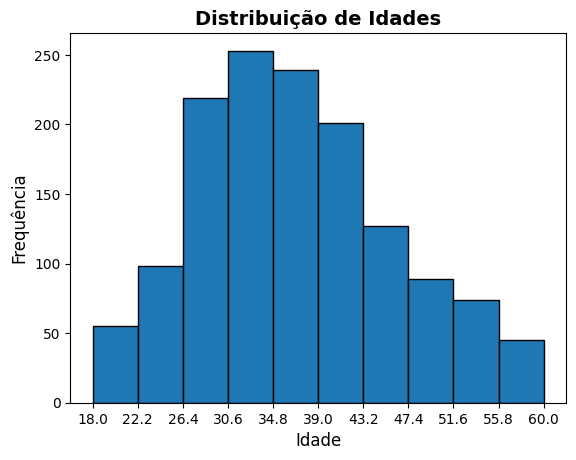

In [ ]:
idades = df['Idade']

#número de classes no histograma
num_bins = 10

#cálculo dos limites inferiores e superiores das classes
bin_edges = np.histogram_bin_edges(idades, bins = num_bins)

#cria o histograma
plt.hist(idades, bins = bin_edges, edgecolor = 'black')

#Define o título
plt.title('Distribuição de Idades',fontweight = 'bold', fontsize = 14)

#Define o título do eixo x
plt.xlabel('Idade', fontsize = 12)

#Define o título do eixo y
plt.ylabel('Frequência', fontsize = 12)

#Redefine a marcação do eixo x para coincidir com os limites inferiores e superiores das classes
plt.xticks(bin_edges)

plt.show()

**INTERPRETAÇÃO**

  Analisando o histograma podemos verificar que a maior parte dos dados se concentram entre 26,4 e 43,2 anos. Os dados estão distribuídos entre 18 e 60 anos de idade. Além disso, a distribuição é assimétrica a direita, pois os valores de idade estão concentrados à esquerda do gráfico.

### Análise de Idade por Função

Na organização, temos as seguintes funções:

In [ ]:
cont_func = df['Funcao'].value_counts()
df_cont_func = pd.DataFrame(cont_func).reset_index()
df_cont_func.columns = ['Função', 'Frequência']
df_cont_func

,Função,Frequência
0,Cientista de Dados,638
1,Analista de Dados,246
2,Engenheiro de IA,176
3,Arquiteto de Dados,139
4,Engenheiro de Dados,125
5,Engenheiro Analitico,76


Para analisar se há grandes diferenças de idade entre as funções, devemos construir gráficos do tipo "boxplot", onde podemos comparar as distribuições de idades para cada função.

Construindo os gráficos de boxplot para cada função, temos:

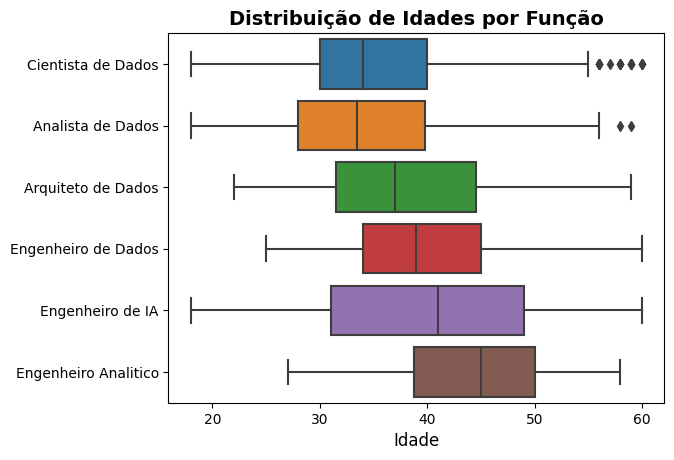

In [ ]:
#Cria o boxplot por função
sns.boxplot(y = df['Funcao'], x = df['Idade'])

#Define o título e o rótulo dos eixos
plt.title('Distribuição de Idades por Função', fontweight = 'bold', fontsize = 14)
plt.xlabel('Idade', fontsize = 12)
plt.ylabel('')

plt.show()

**INTERPRETAÇÃO:**

Os gráficos de boxplot elaborados permitem constatar que as funções de analista e cientista de dados na organização são preenchidos por colaboradores mais jovens. Em contraste, os engenheiros analíticos representam os membros mais experientes da equipe. Uma explicação possível para essa diferença está na necessidade de profissionais com maior experiência para desempenhar o papel de engenheiro analítico. Além disso, é notável que os engenheiros de IA apresentam a maior variedade de idades, englobando desde colaboradores mais jovens até os mais experientes, evidenciando o perfil diversificado dos Engenheiros de IA e a integração de gerações diferentes no mesmo ambiente de trabalho.

### Análise de Gênero

A análise da distribuição de gêneros pode responder diversas perguntas importantes, principalmente sobre diversidade e equidade na organização. Algumas das perguntas que podem ser respondidas são as seguintes:

1. Qual a distribuição de gênero na organização?

2. Existe equilíbrio de gênero nas diferentes funções?

Primeiramente, vamos calcular as frequências de cada gênero e apresentá-las em uma tabela de frequência para entender a representatividade de cada gênero na organização. Em seguida, construiremos um gráfico de rosca para visualizar a proporção (porcentagem) de cada gênero na empresa.

In [ ]:
cont_genero = df['Genero'].value_counts()
df_cont_genero = pd.DataFrame(cont_genero).reset_index()
df_cont_genero.columns = ['Gênero','Frequência']
print('Tabela de Frequências - Gênero')
df_cont_genero

Tabela de Frequências - Gênero


,Gênero,Frequência
0,Masculino,838
1,Feminino,562


Analisando a tabela de frequência, podemos verificar que há uma disparidade no número de funcionários do sexo masculino e do sexo feminino na organização. O que também pode ser evidenciado no gráfico de rosca construído abaixo.

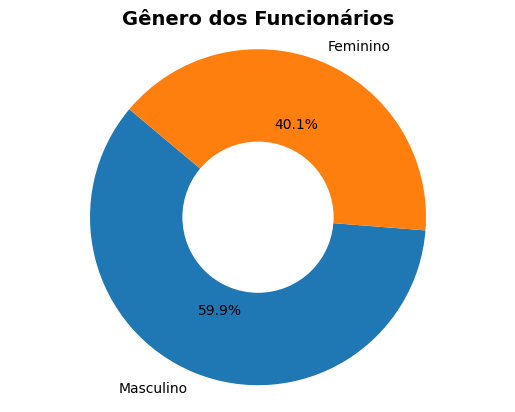

In [ ]:
# Conta a frequência de cada gênero
generos = df['Genero'].value_counts()

# Cria o gráfico de pizza
plt.pie(generos, labels = generos.index, autopct='%1.1f%%', startangle=140)

# Adiciona um círculo branco no meio para transformar o gráfico de pizza em um gráfico de rosca
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equaliza os eixos para garantir que o gráfico seja circular
plt.axis('equal')

# Define o título
plt.title('Gênero dos Funcionários', fontweight = 'bold', fontsize = 14)

# Mostra o gráfico
plt.show()

#### Análise de Gênero por Função

Para verificar se a proporção de gênero é diferente em cada função, foi construído um gráfico de barras agrupadas, conforme mostrado abaixo.

In [ ]:
print('Tabela de Frequência Cruzada em Porcentagem')
tabela_cruzada = pd.crosstab(df['Funcao'], df['Genero'], normalize='index') * 100
print(tabela_cruzada)

Tabela de Frequência Cruzada em Porcentagem
Genero                 Feminino  Masculino
Funcao                                    
Analista de Dados     33.333333  66.666667
Arquiteto de Dados    49.640288  50.359712
Cientista de Dados    38.871473  61.128527
Engenheiro Analitico  38.157895  61.842105
Engenheiro de Dados   40.000000  60.000000
Engenheiro de IA      47.727273  52.272727


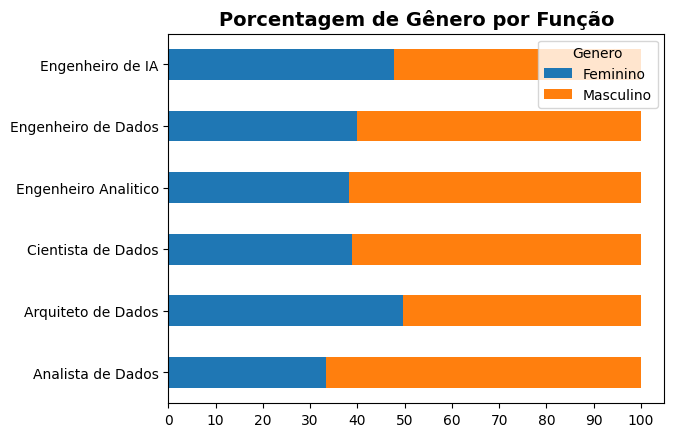

In [ ]:
tabela_cruzada.plot(kind = 'barh', stacked = True)
plt.title('Porcentagem de Gênero por Função', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.xticks(range(0, 101, 10))
plt.show()

**INTERPRETAÇÃO**

O gráfico de barras agrupadas permite observar que as vagas de Engenheiro Analítico, Cientista de Dados e Analista de Dados têm uma presença feminina inferior a 40%, com percentuais respectivos de 38%, 39% e 33%. Ademais, fica evidente que o cargo de Analista de Dados apresenta a menor representativdade de gênero feminino, com apenas 33% das posições preenchidas por mulheres.

### Análise de Estado Civil

A metodologia empregada nesta análise envolve duas etapas principais. Inicialmente, será realizada a contagem das frequência de cada estado civil. Os resultados serão organizados e exibidos em uma tabela de frequência proprocionando uma visão clara da distribuição.

Em seguida, a informação será representada graficamente por meio de um gráfico de rosca. Este gráfico permitirá a visualização da proprorção percentual de cada estado civil entre os colaboradores, facilitando a compreensão da composição da organização em termos de estado civil.

In [ ]:
cont_est_civil = df['Estado Civil'].value_counts()
df_cont_est_civil = pd.DataFrame(cont_est_civil).reset_index()
df_cont_est_civil.columns = ['Estado Civil', 'Frequência']
df_cont_est_civil

,Estado Civil,Frequência
0,Casado,634
1,Solteiro,450
2,Divorciado,316


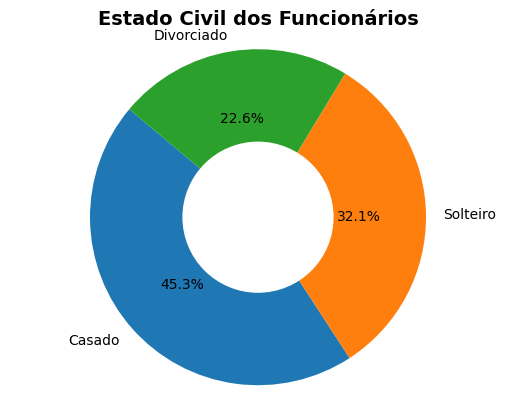

In [ ]:
# Conta a frequência de cada estado civil
est_civil = df['Estado Civil'].value_counts()

# Cria o gráfico de pizza
plt.pie(est_civil, labels = est_civil.index, autopct='%1.1f%%', startangle=140)

# Adiciona um círculo branco no meio para transformar o gráfico de pizza em um gráfico de rosca
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equaliza os eixos para garantir que o gráfico seja circular
plt.axis('equal')

# Define o título
plt.title('Estado Civil dos Funcionários', fontweight = 'bold', fontsize = 14)

# Mostra o gráfico
plt.show()

## 2. Análise de Anos de Experiência dos Funcionários

A análise de abis de experiência dos funcionários, considerando tanto os anos na empresa atual quanto em empresas anteriores pode oferecer resposta as seguintes perguntas:

1. Qual a distribuição de experiência entre os funcionários?

2. Existem diferenças significativas na experiência entre diferentes funções?

### Anos de experiência dos funcionários

In [ ]:
#Cálculo das estatísticas descritivas
media = df['Anos_Experiencia'].mean()
mediana = df['Anos_Experiencia'].median()
minimo = df['Anos_Experiencia'].min()
maximo = df['Anos_Experiencia'].max()
percentil_25 = df['Anos_Experiencia'].quantile(0.25)
percentil_50 = df['Anos_Experiencia'].quantile(0.50)
percentil_75 = df['Anos_Experiencia'].quantile(0.75)

#Impressão das estatísticas
print(f'Média de anos de experiência: {media.round(2)} anos')
print(f'Mediana de anos de experiência: {mediana.round(2)} anos')
print(f'Menor quantidade de anos de experiência: {minimo} anos')
print(f'Maior quantidade de anos de experiência: {maximo} anos')
print(f'Q1: {percentil_25} anos')
print(f'Q2: {percentil_50} anos')
print(f'Q3: {percentil_75} anos')

Média de anos de experiência: 11.28 anos
Mediana de anos de experiência: 10.0 anos
Menor quantidade de anos de experiência: 0 anos
Maior quantidade de anos de experiência: 40 anos
Q1: 6.0 anos
Q2: 10.0 anos
Q3: 15.0 anos


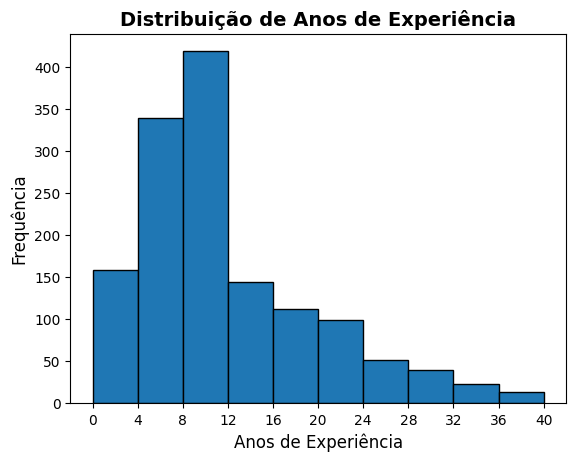

In [ ]:
experiencia = df['Anos_Experiencia']

#número de classes no histograma
num_bins = 10

#cálculo dos limites inferiores e superiores das classes
bin_edges = np.histogram_bin_edges(experiencia, bins = num_bins)

#cria o histograma
plt.hist(experiencia, bins = bin_edges, edgecolor = 'black')

#Define o título
plt.title('Distribuição de Anos de Experiência',fontweight = 'bold', fontsize = 14)

#Define o título do eixo x
plt.xlabel('Anos de Experiência', fontsize = 12)

#Define o título do eixo y
plt.ylabel('Frequência', fontsize = 12)

#Redefine a marcação do eixo x para coincidir com os limites inferiores e superiores das classes
plt.xticks(bin_edges)

plt.show()

**INTERPRETAÇÃO**

O histograma acima revela que 75% dos funcionários detém uma experiência de trabalho que varia de 0 a 15 anos. Nota-se também que 25% dos funcionários, com maior experiência, apresenta um intervalo de 15 a 40 anos de experiência.

A distribuição de dados demonstra uma assimetria à direita, indicando uma concentração de dados à esquerda. Esta observação é corroborada pelos valores de mediana e média, com a média sendo superior a mediana.

A análise dos quartis oferece informações adicionais sobre a distribuição dos anos de experiência dos funcionários. O primeiro quartil, que compreende os 25% de funcionários com menor experiência, acumula até 6 anos de experiência. Já a metade dos funcionários, ou seja, os 50% que se encontram entre o primeiro e o terceiro quartil, apresenta um tempo de experiência situado entre 6 e 15 anos.

### Análise de Anos de Experiência por Função

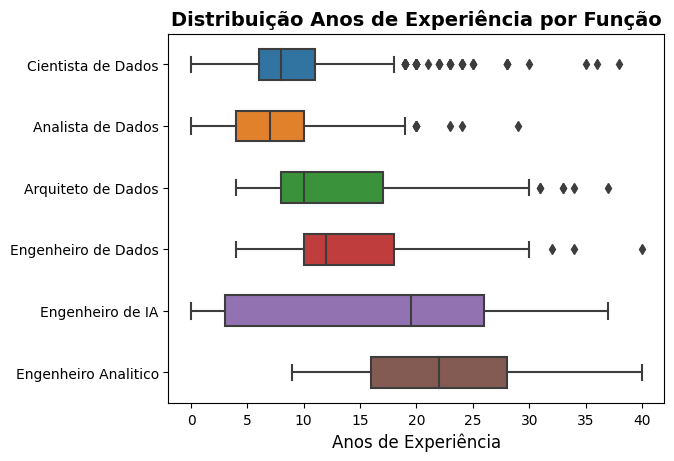

In [ ]:
#Cria o boxplot por função
sns.boxplot(y = df['Funcao'], x = df['Anos_Experiencia'], width=0.5)

#Define o título e o rótulo dos eixos
plt.title('Distribuição Anos de Experiência por Função', fontweight = 'bold', fontsize = 14)
plt.xlabel('Anos de Experiência', fontsize = 12)
plt.ylabel('')

plt.show()

**INTERPRETAÇÃO**

Com base nos boxplots analisados, podemos extrair os seguintes insights técnicos:

A posição de Analista de Dados é caracterizada por ter profissionais com menor tempo de experiência profissional, seguidos pelos Cientistas de Dados. Em seguida, temos oas funções de Arquiteto de Dados e Engenheiro de Dados com tempos de experiência superiores aos de analista e cientista de dados. Tal informação faz sentido, uma vez que ao ingressar na área de dados os profissionais realizam funções corresponder ao perfil de Analista de Dados, após adquirir experiência os profissionais migram para os cargos de Cientista de Dados. Ao explorar a área de dados e adquirir mais experiência, os profissionais podemm ingressar nas funções de Arquiteto de Dados e Engenheiro de Dados, que apresentam uma distribuição de tempo de experiência similar.

Os Engenheiros Analíticos destacam-se por terem o maior tempo de experiência, conforme identificado na análise demográfica de idade. Esta constatação se alinha á exigência prévia de maior experiência profissional para o exercício desta função. Como consequência, os profissionais que ocupam esta posição tendem a ter uma idade maior em relação àqueles que desempenham as demais funções na organização, como visto anteriormente.

Adicionalmente, é importante ressaltar que a função de Engenheiro de IA apresenta a maior diversidade em termos de tempo de experiência profissional. Esta função engloba tanto profissionais jovens quanto mais experientes, evidenciando uma efetiva integração entre diferentes gerações nesse cargo.

## 3. Distribuição de Funcionários por Função

A análise da distribuição de funcionários por função pode responder algumas perguntas importantes para a gestão e planejamento estratégico da organização. Abaixo temos algumas perguntas que são respondidas no presente relatório:

1. Quantos funcionários há em cada função?

2. Existem funções que estão sobrecarregadas ou com poucos funcionários?

A metodologia de análise será estruturada em duas fases. Inicialmente, será realizado a quantificação da frequência de colaboradores para cada função específica. Após isso, será criado um gráfico de barras horizontais para visualizar graficamente as proporções de funcionários em cada função.

In [ ]:
count = df['Funcao'].value_counts()
df_count = pd.DataFrame(count).reset_index()
df_count.columns = ['Função', 'Frequência']
df_count

,Função,Frequência
0,Cientista de Dados,638
1,Analista de Dados,246
2,Engenheiro de IA,176
3,Arquiteto de Dados,139
4,Engenheiro de Dados,125
5,Engenheiro Analitico,76


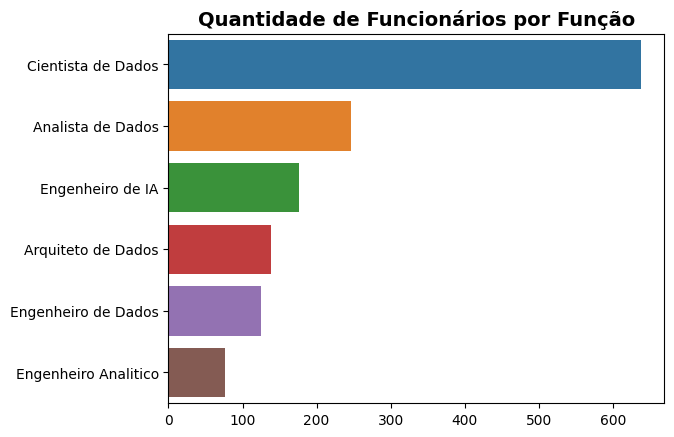

In [ ]:
sns.barplot(x = df['Funcao'].value_counts(), y = df['Funcao'].value_counts().index)
plt.title('Quantidade de Funcionários por Função', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

**INTERPRETAÇÃO**

A avaliaçãp do gráfico de barras revela que a distribuição de funções na empresa é bastante diversificada. Observa-se que a maior parcela de funcionários, equivalente a 46% do total, atua como Cientista de Dados, o que corresponde a um total de 638 indivíduos. A segunda função com maior número de funcionários é a de Analista de Dados, sendo desempenhada por 18% dos funcionários, representando um total de 246 pessoas.

Adicionalmente, a função com a menor representação na empresa é a de Engenheiro Analítico. Esta posição é ocupada por apenas 5,4% dos funcionários, ou seja, um total de 76 funcionários.

## 4. Análise de Mobilidade dos Funcionários da Organização

A metodologia proposta para a avaliação da mobilidade dos funcionários está estrutura em três fases principais.

Na primeira fase, será realizada uma **investigação do tempo de permanência dos funcionários na organização**. Esse parâmetro será analisado para identificar padrões de retenção na empresa.

A segunda fase envolve a avaliação do **período que os funcionários estão na sua função atual**. Isso proporcionará uma visão mais detalhada da mobilidade interna e da progressão de carreira dentro da empresa.

Na terceira, e última fase, será conduzida uma análise combinada dos dados obtidos nas duas fases anteriores. Isso permitirá uma visão integrada da mobilidade dos funcionários, considerando tanto a permanência na empresa quanto na função atual. Esta análise conjunta permitirá uma compreensão mais profunda das dinâmicas de carreira dentro da organização.

### Análise de Anos na Empresa

A análise de anos na empresa pode ajudar a responder as seguintes perguntas:

1. Qual é a média de anos de serviço dos funcionários na organização?

2. Existe uma grande quantidade de funcionários novos na empresa ou a maioria tem muitos anos de serviço?

3. A organização está conseguindo reter os funcionários por um longo período de tempo?

Calculando as estatísticas descritivas do tempo de permanência dos funcionários, temos:

In [ ]:
#Cálculo das estatísticas descritivas
media = df['Anos_na_Empresa'].mean()
mediana = df['Anos_na_Empresa'].median()
minimo = df['Anos_na_Empresa'].min()
maximo = df['Anos_na_Empresa'].max()
percentil_25 = df['Anos_na_Empresa'].quantile(0.25)
percentil_50 = df['Anos_na_Empresa'].quantile(0.50)
percentil_75 = df['Anos_na_Empresa'].quantile(0.75)

#Impressão das estatísticas
print(f'Média: {media.round(2)}')
print(f'Mediana: {mediana.round(2)}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')
print(f'Q1: {percentil_25}')
print(f'Q2: {percentil_50}')
print(f'Q3: {percentil_75}')

Média: 6.97
Mediana: 5.0
Mínimo: 0
Máximo: 40
Q1: 3.0
Q2: 5.0
Q3: 9.0


**INTERPRETAÇÃO:**

Conforme a análise das estatísticas descritivas, identificou-se que três quartos (75%) dos funcionários possuem um tempo de permanência na organização inferior a 9 anos. Os 25% mais longevos possuem períodos de permanência variando de 9 a 40 anos. Além disso, foi observado que metade (50%) do quadro de funcionários está na organização a menos de 5 anos, e 25% apresenta um tempo de serviço inferior a 3 anos.

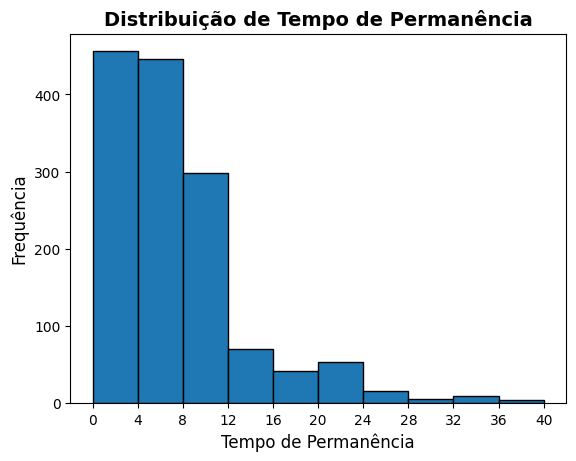

In [ ]:
temp_empres = df['Anos_na_Empresa']

#número de classes no histograma
num_bins = 10

#cálculo dos limites inferiores e superiores das classes
bin_edges = np.histogram_bin_edges(temp_empres, bins = num_bins)

#cria o histograma
plt.hist(temp_empres, bins = bin_edges, edgecolor = 'black')

#Define o título
plt.title('Distribuição de Tempo de Permanência',fontweight = 'bold', fontsize = 14)

#Define o título do eixo x
plt.xlabel('Tempo de Permanência', fontsize = 12)

#Define o título do eixo y
plt.ylabel('Frequência', fontsize = 12)

#Redefine a marcação do eixo x para coincidir com os limites inferiores e superiores das classes
plt.xticks(bin_edges)

plt.show()

In [ ]:
percentil = stats.percentileofscore(df['Anos_na_Empresa'], 12)
print(f'Percentil associado ao valor de 12 anos: {percentil}')

Percentil associado ao valor de 12 anos: 86.21428571428571


**INTERPRETAÇÃO:**

Com base na análise do histograma e do cálculo do percentil para um tempo de permanência de 12 anos, os resultados mostram que 86% dos funcionários detém um tempo de serviço na empresa inferior a 12 anos.

### Análise Conjunta de Tempo de Permanência na Empresa e Tempo de Permanência na Função Atual

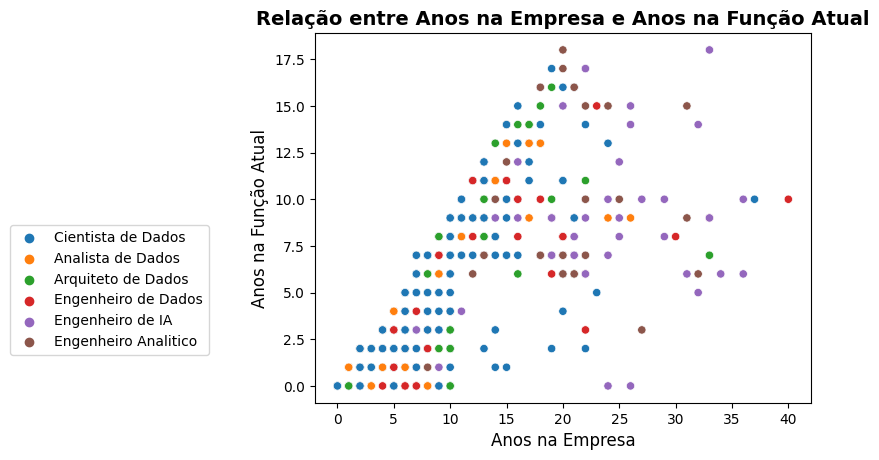

In [ ]:
#Cria o gráfico de dispersão
sns.scatterplot(x = 'Anos_na_Empresa', y = 'Anos_Funcao_Atual', data = df, hue = 'Funcao')

plt.title('Relação entre Anos na Empresa e Anos na Função Atual', fontweight = 'bold', fontsize = 14)
plt.xlabel('Anos na Empresa', fontsize = 12)
plt.ylabel('Anos na Função Atual', fontsize = 12)

plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='best')

plt.show()

## 5. Análise da Remuneração dos Funcionários

### Distribuição do Salário Mensal

O histograma da distribuição da remnueração mensal dos funcionários pode responder as seguintes perguntas:

1. Como é a distribuição de salários na empresa? Os salários estão concentrados em torno de um valor específico?

2. Em torno de qual faixa salarios a maioria dos funcionários está concentrada?

3. Há uma grande variação nos salários na empresa?

4. A distribuição de salários é simétrica ou assimétrica?

In [ ]:
#Cálculo das estatísticas descritivas
media = df['Salario_Mensal'].mean().round(2)
mediana = df['Salario_Mensal'].median()
minimo = df['Salario_Mensal'].min()
maximo = df['Salario_Mensal'].max()
percentil_25 = df['Salario_Mensal'].quantile(0.25)
percentil_50 = df['Salario_Mensal'].quantile(0.50)
percentil_75 = df['Salario_Mensal'].quantile(0.75)
print(f'Salário médio: R$ {media}')
print(f'Mediana do salário: R$ {mediana}')
print(f'Menor salário: R$ {minimo}')
print(f'Maior salário: R$ {maximo}')
print(f'Q1: R$ {percentil_25}')
print(f'Q2: R$ {percentil_50}')
print(f'Q3: R$ {percentil_75}')

Salário médio: R$ 6927.51
Mediana do salário: R$ 5204.0
Menor salário: R$ 1009
Maior salário: R$ 19999
Q1: R$ 2996.0
Q2: R$ 5204.0
Q3: R$ 9623.5


**INTERPRETAÇÃO**

Com base nas estatísticas descritivas apresentadas, a remuneração média dos colaboradores é de 6.927,51. A empresa dispõe de uma faixa salarial que se estende desde o valor mínimo de 1.009,00 até o máximo de 19.999.

A análise da distribuição salarial através dos quartis, mostra que os funcionários se dividem em três grupos. O primeiro, que abrange 25% dos funcuonários, recebe entre 1.009,00 e 2.996,00. Isso representa aqueles que estão nos níveis iniciais de remuneração. O segundo grupo, que abrange a meta dos funcionários, tem salários variando entre 2.996,00 e 9.623,00. Esse é o intervalo de salário para a maioria dos funcionários, sendo a faixa intermediária (entre o primeiro e terceiro quartil). O terceiro grupo, com os maiores salários, consistem nos 25% restantes dos funcionários, e apresenta valores salariais entre 9.623,00 e 19.999,00.

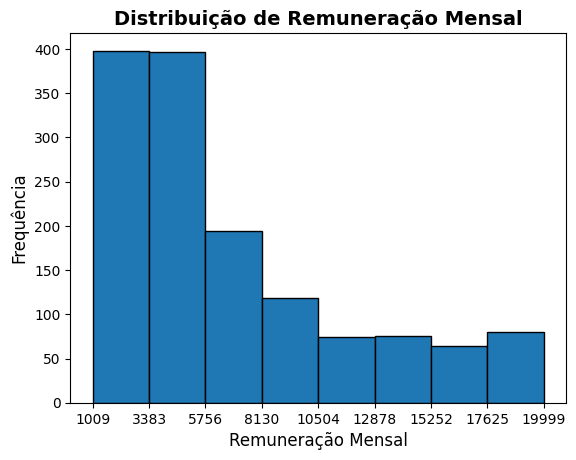

In [ ]:
salario = df['Salario_Mensal']

#número de classes no histograma
num_bins = 8

#cálculo dos limites inferiores e superiores das classes
bin_edges = np.histogram_bin_edges(salario, bins = num_bins)

#cria o histograma
plt.hist(salario, bins = bin_edges, edgecolor = 'black')

#Define o título
plt.title('Distribuição de Remuneração Mensal',fontweight = 'bold', fontsize = 14)

#Define o título do eixo x
plt.xlabel('Remuneração Mensal', fontsize = 12)

#Define o título do eixo y
plt.ylabel('Frequência', fontsize = 12)

#Redefine a marcação do eixo x para coincidir com os limites inferiores e superiores das classes
plt.xticks(bin_edges)

plt.show()

**INTERPRETAÇÃO**

Com base nas estatísticas descritivas e no histograma acima, podemos obter as seguintes conclusões sobre a distribuição dos salários mensais praticados pela empresa.

Os salários estão concentrados entre 1.009,00 e 9.623,5, faixa que engloba 75% dos funcionários da empresa. Além disso, a distribuição é assimétrica à direita, com os dados concentrados nas faixas de salário maais baixas (à esquerda).

### Remuneração por Gênero

A análise de remnueração por gênero pode responder as seguintes perguntas:

1. Existe uma diferença salarial significativa entre os gêneros?

2. Qual é a distribuição de salários entre os gêneros?

3. Existem alguma tendência ou discrepância notável na remuneração entre os sexos masculinos e femininos?

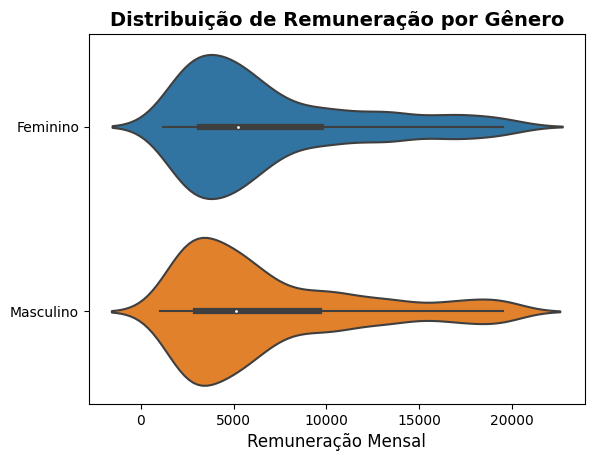

In [ ]:
# Cria o gráfico de violino
sns.violinplot(y = df['Genero'], x = df['Salario_Mensal'])

# Define o título do gráfico e os rótulos dos eixos
plt.title('Distribuição de Remuneração por Gênero', fontweight = 'bold', fontsize = 14)
plt.xlabel('Remuneração Mensal', fontsize = 12)
plt.ylabel('')

# Exibe o gráfico
plt.show()

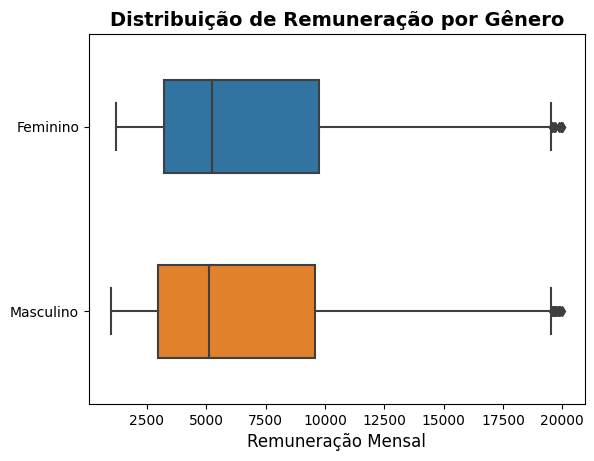

In [ ]:
#Cria o boxplot por função
sns.boxplot(y = df['Genero'], x = df['Salario_Mensal'], width=0.5)

#Define o título e o rótulo dos eixos
plt.title('Distribuição de Remuneração por Gênero', fontweight = 'bold', fontsize = 14)
plt.xlabel('Remuneração Mensal', fontsize = 12)
plt.ylabel('')

plt.show()

**INTERPRETAÇÃO**

Ao analisar a forma como os salários estão distribuídos entre os gêneros, utilizando os gráficos do tipo boxplot e estatísticas descritivas, é possível constatar que não há diferenças notáveis entre os salários de funcionários do sexo masculino e feminino.

Em outras palavras, a análise mostra que homens e mulheres na organização estão ganhando de maneira bastante semelhante. Não se percebe um padrão que indique um gênero recebendo mais ou menos que outro. Os valores de salários estão distribuídos de maneira parecida entre ambos os gêneros, o que indica um cenário de igualdade salarial na empresa.

In [ ]:
#Cálculo das estatísticas descritivas
df.groupby(by = 'Genero')['Salario_Mensal'].describe()

,count,mean,std,min,25%,50%,75%,max
Genero,,,,,,,,
Feminino,562.0,6986.590747,4873.736068,1200.0,3204.25,5229.5,9732.25,19980.0
Masculino,838.0,6887.884248,4985.268703,1009.0,2960.00,5138.5,9597.00,19999.0


### Remuneração por Função

A análise de remnueração mensal por função pode responder as seguintes perguntas de negócio?

1. Quais funções tem os maiores salários médios?

2. Quais funções têm a maior variação de salário?

3. Existem alguma função que apresenta discrepância salarial significativa quando comparada com as demais?

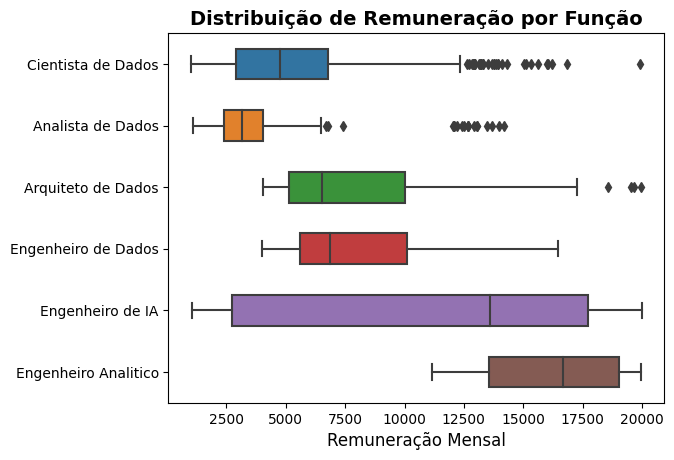

In [ ]:
#Cria o boxplot por função
sns.boxplot(y = df['Funcao'], x = df['Salario_Mensal'], width=0.5)

#Define o título e o rótulo dos eixos
plt.title('Distribuição de Remuneração por Função', fontweight = 'bold', fontsize = 14)
plt.xlabel('Remuneração Mensal', fontsize = 12)
plt.ylabel('')

plt.show()

In [ ]:
# Agrupa o DataFrame por 'Funcao' e calcula Q1 e Q3 para cada grupo
quartiles = df.groupby('Funcao')['Salario_Mensal'].quantile([0.25, 0.75]).unstack()

# Calcula o IQR para cada grupo
quartiles['IQR'] = quartiles[0.75] - quartiles[0.25]

# Calcula os limites inferiores e superiores dos outliers para cada grupo
quartiles['Limite_Inferior'] = quartiles[0.25] - 1.5 * quartiles['IQR']
quartiles['Limite_Superior'] = quartiles[0.75] + 1.5 * quartiles['IQR']

quartiles

,0.25,0.75,IQR,Limite_Inferior,Limite_Superior
Funcao,,,,,
Analista de Dados,2399.50,4057.25,1657.75,-87.125,6543.875
Arquiteto de Dados,5136.00,10028.00,4892.00,-2202.000,17366.000
Cientista de Dados,2915.50,6798.25,3882.75,-2908.625,12622.375
Engenheiro Analitico,13573.75,19040.75,5467.00,5373.250,27241.250
Engenheiro de Dados,5582.00,10096.00,4514.00,-1189.000,16867.000
Engenheiro de IA,2725.00,17712.75,14987.75,-19756.625,40194.375


In [ ]:
# Percorre cada função
for funcao in df['Funcao'].unique():
    dados = df[df['Funcao'] == funcao]['Salario_Mensal']
    limite_superior = quartiles.loc[funcao, 'Limite_Superior']

    # Calcula o percentil correspondente ao limite superior
    percentil = stats.percentileofscore(dados, limite_superior).round(2)

    print(f'Função: {funcao}, Limite Superior: {limite_superior}, Percentil Correspondente: {percentil}')

Função: Cientista de Dados, Limite Superior: 12622.375, Percentil Correspondente: 94.67
Função: Analista de Dados, Limite Superior: 6543.875, Percentil Correspondente: 92.28
Função: Arquiteto de Dados, Limite Superior: 17366.0, Percentil Correspondente: 97.12
Função: Engenheiro de Dados, Limite Superior: 16867.0, Percentil Correspondente: 100.0
Função: Engenheiro de IA, Limite Superior: 40194.375, Percentil Correspondente: 100.0
Função: Engenheiro Analitico, Limite Superior: 27241.25, Percentil Correspondente: 100.0


**INTERPRETAÇÃO**

Os gráficos demonstram que, em termos salariais, os cargos de Analista de Dados e Cientista de Dados possuem os menores salários da empresa. Já os Engenheiros Analíticos, por outro lado, possuem os maiores salários.

Em um nível intermediário, temos os Arquitetos de Dados e Engenheiros de Dados, que ganham mais que Analistas e Cientistas de Dados, mas menos do que Engenheiros Analíticos.

É importante destacar também a função de Engenheiro de IA, que tem uma ampla faixa salarial. Metade dos profissionais nessa posição ganham entre 2.725,00 e 17.712,75, o que mostra uma grande divesidade de salários dentro dessa função.

Estas descobertas fazem sentido quando analisamos a experiência dos profissionais em cada função. Por exemplo, os Analistas de Dados normalmente são profissionais com menos experiência. É comum para profissionais inicar sua carreira na área de dados como Analitsas e, em seguida, avançar para a posição de Cientista de Dados, o que geralmente vem acompanhado de um aumento salarial.

As funções de Arquiteto de Dados e Engenheiro de Dados costumam ser ocupadas por Analistas e Cientistas de Dados que decidiram se especializar em áreas específicas do campo da Ciência de Dados. A função de Engenheiro de IA é a que apresenta a maior diversidade de experiência, abrigando desde profissionais jovens até os mais experientes. Isso explica a grande variação nos salários nesta função.

Finalmente, os Engenheiros Analíticos tendem a ser os profissionais mais experientes, devido às responsabilidades do cargo, o que justifica porque recebem os maiores salários.

### Remuneração por Anos de Experiência

A análise de remnueração por anos de experiência nos ajuda a responder as seguintes perguntas:

1. Existe uma correlação positiva entre a remuneração mensal e os anos de experiência?

2. Os funcionários com mais experiência tendem a ter salários mais altos?

3. Há exceções notáveis a essa tendência?

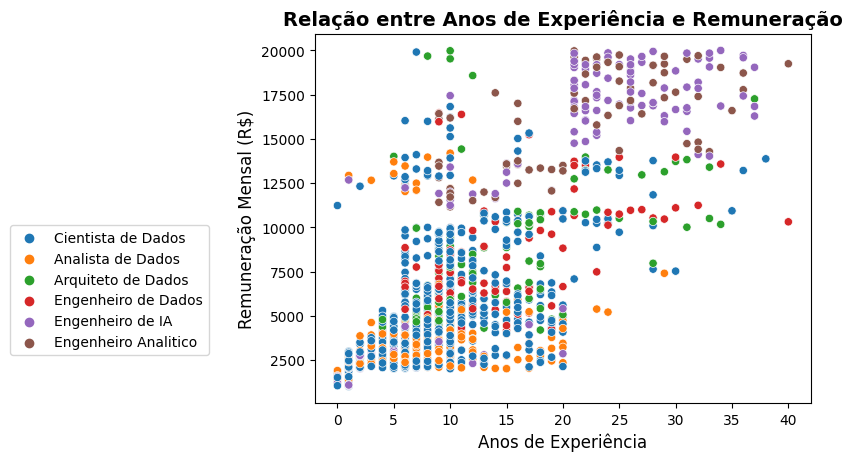

In [ ]:
#Cria o gráfico de dispersão
sns.scatterplot(x = 'Anos_Experiencia', y = 'Salario_Mensal', data = df, hue = 'Funcao')

plt.title('Relação entre Anos de Experiência e Remuneração', fontweight = 'bold', fontsize = 14)
plt.xlabel('Anos de Experiência', fontsize = 12)
plt.ylabel('Remuneração Mensal (R$)', fontsize = 12)

plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='best')

plt.show()

In [ ]:
correlacao = df['Anos_Experiencia'].corr(df['Salario_Mensal'])

print(f'A correlação entre anos de experiência e salário mensal é: {correlacao.round(3)}')

A correlação entre anos de experiência e salário mensal é: 0.714


**INTERPRETAÇÃO**

Ao observar o gráfico de dispersão, que relaciona a remuneração mensal com os anos de experiência dos funcionários, nota-se uma tendência: em geral, quanto mais experiência o funcionário tem, maior tende a ser seu salário mensal. O coeficiente de correlação de Pearson calculado também corrobora para essa observação, uma vez que o coeficiente apresentou valor de 0,714, demonstrando uma alta correlação entre ambas as variáveis analisadas. Esses dados indicam que, normalmente, à medida que um funcionário acumula mais anos de serviço, mais ele tende a observar um aumento em sua remuneração mensal.

No entanto, existem algumas exceções notáveis que chamam a atenção no gráfico. Algumas pessoas com pouca experiência, menos de 5 anos, têm salários significativamente acima da média da empresa, ultrapassando a marca de 12.000,00 por mês. Esses casos são excepecionais e podem indicar situações especiais, como habilidades técnicas únicas ou outras circunstâncias que permitam um salário maior do que os demais, considerando seu nível de experiência.

Além disso, é possível observar também que diferentes funções possuem correlações distintas entre remuneração mensal e nível de experiência. Dessa forma, devemos analisar as duas variáveis coonsiderando as diferentes funções.

### Remuneração por Anos de Experiência e por Função

#### Analista de Dados

Analisando o gráfico de dispersão e a correlação para o cargo de Analista de Dados, temos:

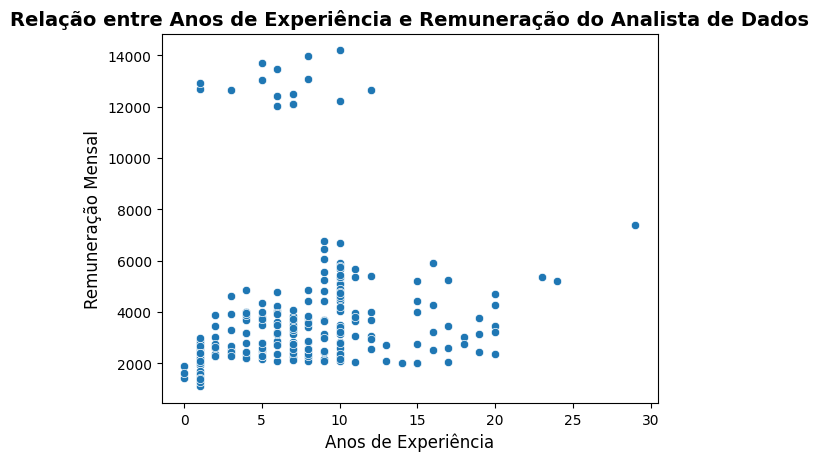

In [ ]:
#Cria o gráfico de dispersão
sns.scatterplot(x = 'Anos_Experiencia', y = 'Salario_Mensal', data = df[df['Funcao'] == 'Analista de Dados'])

plt.title('Relação entre Anos de Experiência e Remuneração do Analista de Dados', fontweight = 'bold', fontsize = 14)
plt.xlabel('Anos de Experiência', fontsize = 12)
plt.ylabel('Remuneração Mensal', fontsize = 12)

plt.show()

In [ ]:
df_analista_dados = df[df['Funcao'] == 'Analista de Dados']
correlacao = df_analista_dados['Anos_Experiencia'].corr(df_analista_dados['Salario_Mensal'])

print(f'A correlação entre anos de experiência e salário mensal é: {correlacao.round(3)}')

A correlação entre anos de experiência e salário mensal é: 0.116


In [ ]:
df_analista_dados = df[df['Funcao'] == 'Analista de Dados']
df_analista_dados = df_analista_dados[df_analista_dados['Salario_Mensal'] < 10000]
correlacao = df_analista_dados['Anos_Experiencia'].corr(df_analista_dados['Salario_Mensal'])

print(f'A correlação entre anos de experiência e salário mensal é: {correlacao.round(3)}')

A correlação entre anos de experiência e salário mensal é: 0.414


**INTERPRETAÇÃO**

O gráfico de dispersão nos fornece uma visão sobre a disparidade entre dois grupos de Analistas de Dados. De um lado, é possível observar um grupo que, apesar de possuir pouca experiência profissional, tem salários que superam significativamente a média salarial da empresa e da função.

Ao avaliar a correlação geral entre os anos de experiência e o salário mensal para todos os Analistas de Dados, é possível observar que a relação entre as duas variáveis é fraca, devido a influência dos indíviduos com salários altos e pouca epxeriência, com correlação de Pearson de 0,116. Esse valor de coeficiente sugere que os anos de experiência e o salários desses profissionais não parecem ter uma forte ligação.

No entanto, ao focarmos em um subconjunto de Analistas de Dados com salários inferiores a 10.000,00, a história muda um pouco. Para esse grupo, a correlação entre o salário mensal e a experiência aumenta para 0,44, sugerindo uma ligação mais forte entre esses dois fatores.

Um aspecto importante a considerar é que os anos de experiência são contabilizados considerando não apenas o tempo na empresa atual, mas também em experiências em empresas anteriores. Contudo, não há meios de determinar se essas experiências anteriores foram na área de Análise de Dados. Portanto, esse fator pode afetar a interpretação da correlação, uma vez que pode haver profissionais que mudaram de carreira e começaram como Analistas de Dados na empresa atual, mas possuíam experiência em outras áreas.

Essa situação pode ser evidenciada pela presença de profissionais que têm mais de 5 anos de experiência mas estão na faixa de salários mais baixos. Essa constatação sugere que esses profissionais podem ter feito a transição de carreira e estão acumulando experiência na área de Análise de Dados na função atual, o que pode explicar a remuneração atual.

Analisando o gráfico de dispersão relacionando os anos de experiência na empresa atual e a remuneração mensal, temos o seguinte gráfico:

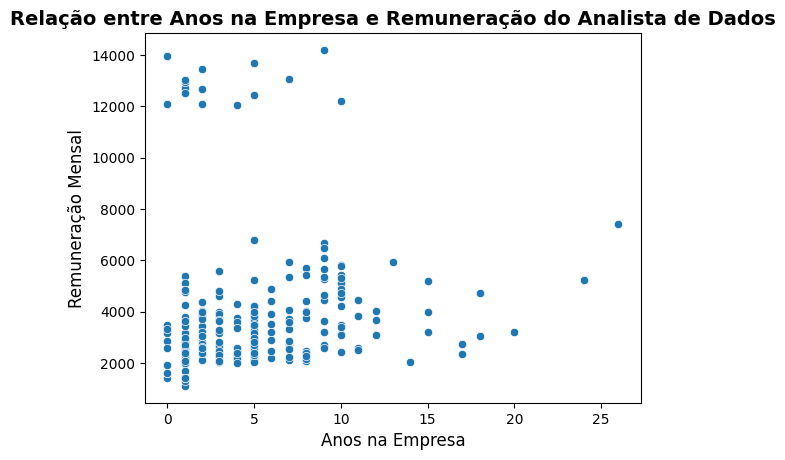

In [ ]:
#Cria o gráfico de dispersão
sns.scatterplot(x = 'Anos_na_Empresa', y = 'Salario_Mensal', data = df[df['Funcao'] == 'Analista de Dados'])

plt.title('Relação entre Anos na Empresa e Remuneração do Analista de Dados', fontweight = 'bold', fontsize = 14)
plt.xlabel('Anos na Empresa', fontsize = 12)
plt.ylabel('Remuneração Mensal', fontsize = 12)

plt.show()

**INTERPRETAÇÃO**

O gráfico de dispersão é semelhante ao obtido anteriormente, porém estamos analisando apenas os de empresa do funcionário, eliminando o fator dos profissionais em transição de carreira.

Destaca-se a presença de funcionários que possuem um longo histórico de serviço na empresa, mas que ainda se encontram nas categorias salariais mais baixas da suas respectiva função.

Em temros práticos, isso significa que temos colaboradores com muitos anos de experiência que, no entanto, não tiveram um correspondente aumento salarial ao longo do tempo.


**HIPÓTESES**

As hipóteses que devem ser avaliadas para esse fato são elencadas abaixo:

1. **Falta de progressão salarial**: a empresa pode ter políticas inadequadas de progressão salarial, resultando em funcionários com muita experiência recebendo salários baixos dentro da função;
2. **Treinamento e Desenvolvimento**: talvez os funcionários não estejam recebendo treinamentos e habilidades necessárias para progredir na carreira;
3. **Avaliação de performance**: talvez a empresa não esteja levando em consideração os anos de experiência como fator relevante para os aumentos salariais.

#### Cientista de Dados

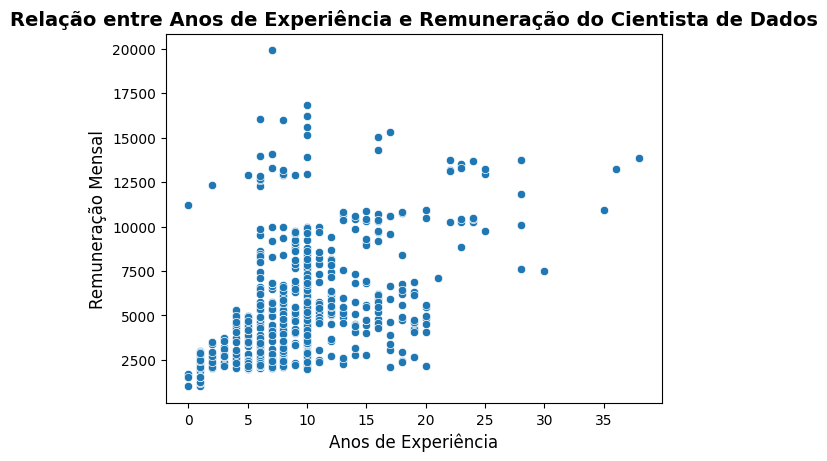

In [ ]:
#Cria o gráfico de dispersão
sns.scatterplot(x = 'Anos_Experiencia', y = 'Salario_Mensal', data = df[df['Funcao'] == 'Cientista de Dados'])

plt.title('Relação entre Anos de Experiência e Remuneração do Cientista de Dados', fontweight = 'bold', fontsize = 14)
plt.xlabel('Anos de Experiência', fontsize = 12)
plt.ylabel('Remuneração Mensal', fontsize = 12)

plt.show()

In [ ]:
df[df['Funcao'] == 'Cientista de Dados']['Salario_Mensal'].describe()

count      638.000000
mean      5492.095611
std       3168.863680
min       1009.000000
25%       2915.500000
50%       4737.500000
75%       6798.250000
max      19907.000000
Name: Salario_Mensal, dtype: float64

In [ ]:
df_cientista_dados = df[df['Funcao'] == 'Cientista de Dados']
correlacao = df_cientista_dados['Anos_Experiencia'].corr(df_cientista_dados['Salario_Mensal'])

print(f'A correlação entre anos de experiência e salário mensal é: {correlacao.round(3)}')

A correlação entre anos de experiência e salário mensal é: 0.471


**INTERPRETAÇÃO**

O gráfico de dispersão ilustra uma tendência clara: quanto mais anos de experiência em profissional tem, maior é a sua remuneração mensal. Esse padrão é reforçado por um coeficiente de correlação de 0,471, o que indica uma correlação boa entre anos de experiência e remuneração.

Porém, de forma semelhante ao observado com o conjunto de Analista de Dados, existem exceções a essa tendência. Alguns profissionais, apesar da menor experiência, estão ganhando bem acima da média dos demais Cientistas de Dados. Isso indica que, embora a experiência resulte em salários maiores, há outros fatores não observados nessa análise que contribuem significativamente para a remuneração profissional.

#### Arquiteto de Dados

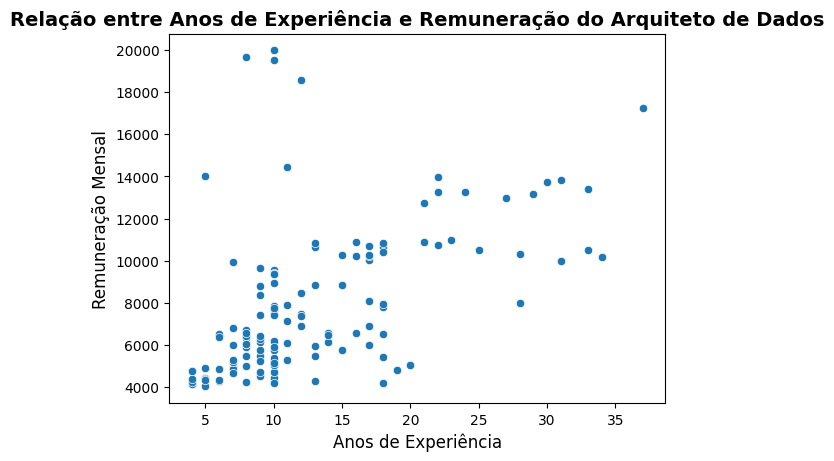

In [ ]:
#Cria o gráfico de dispersão
sns.scatterplot(x = 'Anos_Experiencia', y = 'Salario_Mensal', data = df[df['Funcao'] == 'Arquiteto de Dados'])

plt.title('Relação entre Anos de Experiência e Remuneração do Arquiteto de Dados', fontweight = 'bold', fontsize = 14)
plt.xlabel('Anos de Experiência', fontsize = 12)
plt.ylabel('Remuneração Mensal', fontsize = 12)

plt.show()

In [ ]:
df_arquiteto_dados = df[df['Funcao'] == 'Arquiteto de Dados']
correlacao = df_arquiteto_dados['Anos_Experiencia'].corr(df_arquiteto_dados['Salario_Mensal'])

print(f'A correlação entre anos de experiência e salário mensal é: {correlacao.round(3)}')

A correlação entre anos de experiência e salário mensal é: 0.524


**INTERPRETAÇÃO**

O coeficiente de correlação indica uma alta correlação positiva entre as duas variáveis, uma vez que o valor está entre 0,5 e 0,7.

#### Engenheiro de Dados

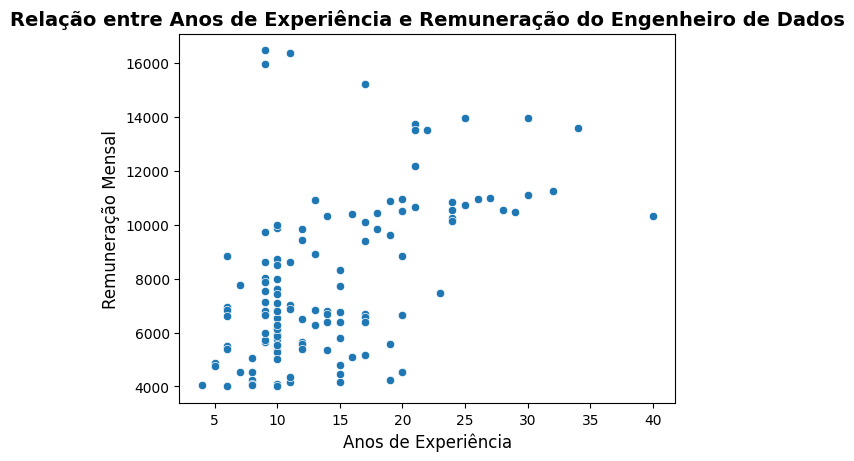

In [ ]:
#Cria o gráfico de dispersão
sns.scatterplot(x = 'Anos_Experiencia', y = 'Salario_Mensal', data = df[df['Funcao'] == 'Engenheiro de Dados'])

plt.title('Relação entre Anos de Experiência e Remuneração do Engenheiro de Dados', fontweight = 'bold', fontsize = 14)
plt.xlabel('Anos de Experiência', fontsize = 12)
plt.ylabel('Remuneração Mensal', fontsize = 12)

plt.show()

In [ ]:
df_engenheiro_dados = df[df['Funcao'] == 'Engenheiro de Dados']
correlacao = df_engenheiro_dados['Anos_Experiencia'].corr(df_engenheiro_dados['Salario_Mensal'])

print(f'A correlação entre anos de experiência e salário mensal é: {correlacao.round(3)}')

A correlação entre anos de experiência e salário mensal é: 0.531


**INTERPRETAÇÃO**

O coeficiente de correlação indica uma alta correlação positiva entre as duas variáveis, uma vez que o valor está entre 0,5 e 0,7.

#### Engenheiro de IA

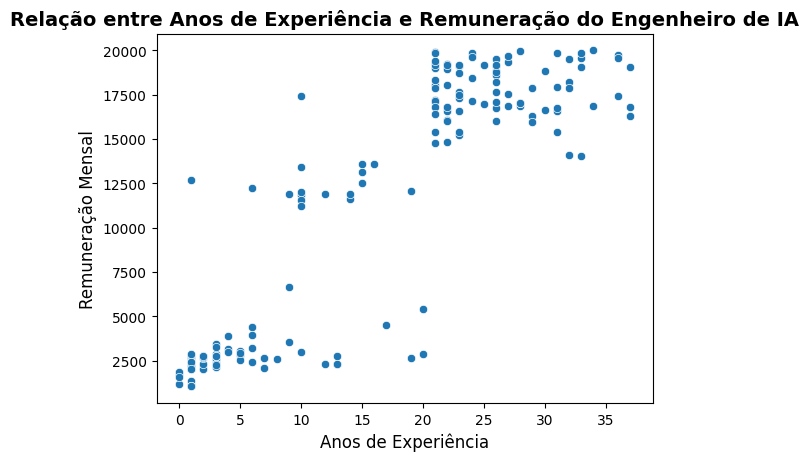

In [ ]:
#Cria o gráfico de dispersão
sns.scatterplot(x = 'Anos_Experiencia', y = 'Salario_Mensal', data = df[df['Funcao'] == 'Engenheiro de IA'])

plt.title('Relação entre Anos de Experiência e Remuneração do Engenheiro de IA', fontweight = 'bold', fontsize = 14)
plt.xlabel('Anos de Experiência', fontsize = 12)
plt.ylabel('Remuneração Mensal', fontsize = 12)

plt.show()

In [ ]:
df_engenheiro_ia = df[df['Funcao'] == 'Engenheiro de IA']
correlacao = df_engenheiro_ia['Anos_Experiencia'].corr(df_engenheiro_ia['Salario_Mensal'])

print(f'A correlação entre anos de experiência e salário mensal é: {correlacao.round(3)}')

A correlação entre anos de experiência e salário mensal é: 0.891


**INTERPRETAÇÃO**

O coeficiente de correlação indica uma forte correlação positiva entre as duas variáveis, uma vez que o valor está entre 0,7 e 1.

#### Engenheiro Analítico

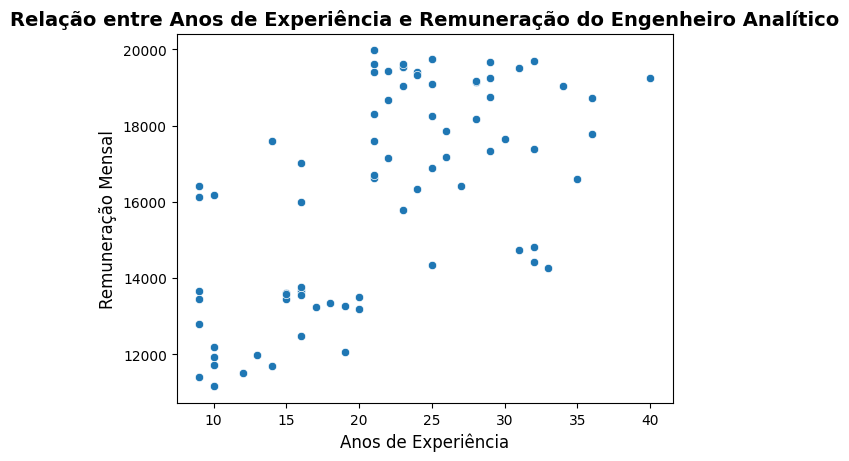

In [ ]:
#Cria o gráfico de dispersão
sns.scatterplot(x = 'Anos_Experiencia', y = 'Salario_Mensal', data = df[df['Funcao'] == 'Engenheiro Analitico'])

plt.title('Relação entre Anos de Experiência e Remuneração do Engenheiro Analítico', fontweight = 'bold', fontsize = 14)
plt.xlabel('Anos de Experiência', fontsize = 12)
plt.ylabel('Remuneração Mensal', fontsize = 12)

plt.show()

In [ ]:
df_engenheiro_analitico = df[df['Funcao'] == 'Engenheiro Analitico']
correlacao = df_engenheiro_analitico['Anos_Experiencia'].corr(df_engenheiro_analitico['Salario_Mensal'])

print(f'A correlação entre anos de experiência e salário mensal é: {correlacao.round(3)}')

A correlação entre anos de experiência e salário mensal é: 0.618


**INTERPRETAÇÃO**

O coeficiente de correlação indica uma correlação forte entre as variáveis, uma vez que foi um obtido um valor de 0,618.

## 6. Análise da Satisfação e Envolvimento no Trabalho

Significado dos valores de nível de satisfação e envolvimento no trabalho:

1 - Ruim;

2 - Baixo;

3 - Médio;

4 - Alto.

In [ ]:
df['Nivel_Satisfacao_Trabalho'] = df['Nivel_Satisfacao_Trabalho'].replace({1: 'Ruim',2: 'Baixo',3: 'Médio', 4: 'Alto'})
df['Indice_Envolvimento_Trabalho'] = df['Indice_Envolvimento_Trabalho'].replace({1: 'Ruim',2: 'Baixo',3: 'Médio', 4: 'Alto'})

### Nível de Satisfação no Trabalho

A análise do nível de satisfação pode responder as seguintes perguntas:

1. Qual é o nível de satisfação geral dos funcionários no trabalho?
2. Quantos funcionários reportam um alto nível de satisfação e quantos reportam um baixo nível?
3. Qual é o nível de satisfação mais comum entre os funcionários?

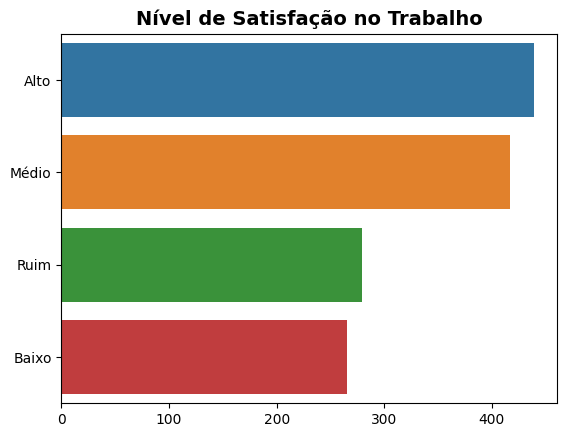

In [ ]:
sns.barplot(x = df['Nivel_Satisfacao_Trabalho'].value_counts(), y = df['Nivel_Satisfacao_Trabalho'].value_counts().index)
plt.title('Nível de Satisfação no Trabalho', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

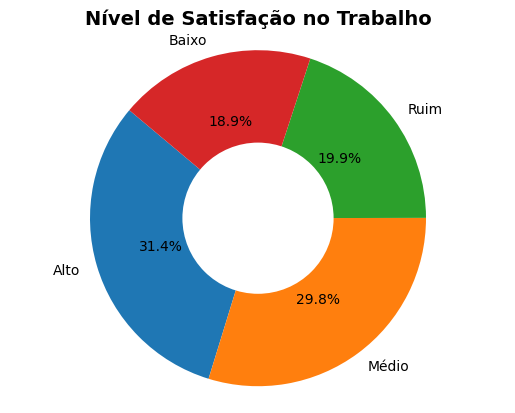

In [ ]:
# Conta a frequência de cada estado civil
nivel_satisfacao = df['Nivel_Satisfacao_Trabalho'].value_counts()

# Cria o gráfico de pizza
plt.pie(nivel_satisfacao, labels = nivel_satisfacao.index, autopct='%1.1f%%', startangle=140)

# Adiciona um círculo branco no meio para transformar o gráfico de pizza em um gráfico de rosca
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equaliza os eixos para garantir que o gráfico seja circular
plt.axis('equal')

# Define o título
plt.title('Nível de Satisfação no Trabalho', fontweight = 'bold', fontsize = 14)

# Mostra o gráfico
plt.show()

**INTERPRETAÇÃO**

A maioria dos funcionários informou um nível de satisfação alto (31,4%) ou médio (29,8%), totalizando 61,2% dps colaboradores. Esses resultados sugerem que a maior parte do quadro encontra-se relativamente satisfeita com o seu trabalho na empresa.

No entanto, também há uma parcela considerável de funcionários que expressaram baixa satisfação (18,9%) ou mesmo classificaram a satisfação como ruim (19,9%). Esse total de 38,8% de funcionários insatisfeitos ou muito insatisfeitos é um número preocupante. Medidas devem ser adotadas para abordar o problema da insatisfação, pois isso pode resultar em uma série de desafios, incluindo baixa produtividade, alto turnover e um clima de trabalho menos positivo.

#### Nível de Satisfação por Função

A análise de nível de satisfação por função pode responder as seguintes perguntas:

1. Existe alguma função que apresenta um nível de satisfação consistentemente mais alto ou mais baixo em comparação com as outras funções?
2. Qual função tem a maior proporção de funcionários com alta satisfação? E a menor proporção?
3. Existe alguma função que tenha uma grande proporção de funcionários com baixa satisfação?

In [ ]:
print('Tabela de Frequência Cruzada em Porcentagem')
tabela_cruzada = pd.crosstab(df['Funcao'], df['Nivel_Satisfacao_Trabalho'], normalize='index') * 100
tabela_cruzada = tabela_cruzada[['Alto', 'Médio', 'Baixo', 'Ruim']]
print(tabela_cruzada.round(2))

Tabela de Frequência Cruzada em Porcentagem
Nivel_Satisfacao_Trabalho   Alto  Médio  Baixo   Ruim
Funcao                                               
Analista de Dados          30.89  28.05  18.29  22.76
Arquiteto de Dados         27.34  34.53  20.86  17.27
Cientista de Dados         32.60  29.00  18.34  20.06
Engenheiro Analitico       27.63  32.89  19.74  19.74
Engenheiro de Dados        33.60  31.20  15.20  20.00
Engenheiro de IA           30.68  28.98  22.73  17.61


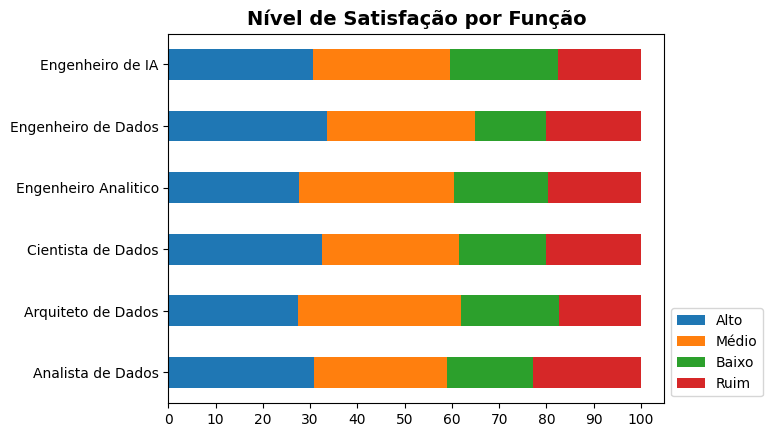

In [ ]:
tabela_cruzada.plot(kind = 'barh', stacked = True)
plt.title('Nível de Satisfação por Função', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.xticks(range(0, 101, 10))

plt.legend(bbox_to_anchor=(1.0, 0.0), loc='lower left')

plt.show()

**INTERPRETAÇÃO**

De acordo com os dados analisados, é possível observar que os níveis desatisfação dos funcionários são bastante consistentes entre as as várias funções na empresa. Isso significa que, independentemente da função, a maior parte dos funcionários tem uma percepção semelhante sobre sua satisfação no trabalho. Esse resultado sugere um ambiente de trabalho equilibrado e uniforme.

No entanto, ao examinarmos detalhadamente, é possível verificar que a função de Analista de Dados aparenta possuir os funcionários com os piores níveis de satisfação do que seus colegas nas demais funções. Mais de 20% deles classificaram seu nível de satisfação como "ruim". Dessa forma, somando os resultados dos níveis "ruim" e "baixo" concluímos que mais de 40% dos Analistas de Dados não estão satisfeitos em suas posições.

In [ ]:
print('Tabela de Frequência Cruzada em Porcentagem')
tabela_cruzada = pd.crosstab(df['Genero'], df['Nivel_Satisfacao_Trabalho'], normalize='index') * 100
tabela_cruzada = tabela_cruzada[['Alto', 'Médio', 'Baixo', 'Ruim']]
print(tabela_cruzada.round(2))

Tabela de Frequência Cruzada em Porcentagem
Nivel_Satisfacao_Trabalho   Alto  Médio  Baixo   Ruim
Genero                                               
Feminino                   28.47  30.78  19.93  20.82
Masculino                  33.29  29.12  18.26  19.33


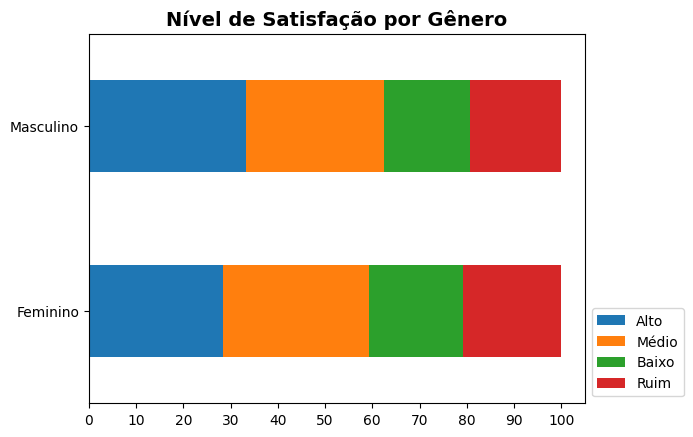

In [ ]:
tabela_cruzada.plot(kind = 'barh', stacked = True)
plt.title('Nível de Satisfação por Gênero', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.xticks(range(0, 101, 10))

plt.legend(bbox_to_anchor=(1.0, 0.0), loc='lower left')

plt.show()

### índice de Envolvimento no Trabalho

A análise de índice de envolvimento no trabalho pode ajudar a responder as seguintes perguntas:

1. Qual é índice de envolvimento mais comum na empresa?
2. Qual a proporção de colaboradores que tem um índice de envolvimento considerado ruim baixo, médio ou alto?

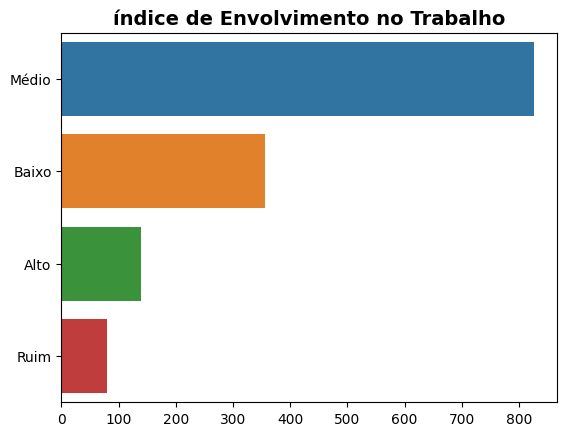

In [ ]:
sns.barplot(x = df['Indice_Envolvimento_Trabalho'].value_counts(), y = df['Indice_Envolvimento_Trabalho'].value_counts().index)
plt.title('índice de Envolvimento no Trabalho', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.show()

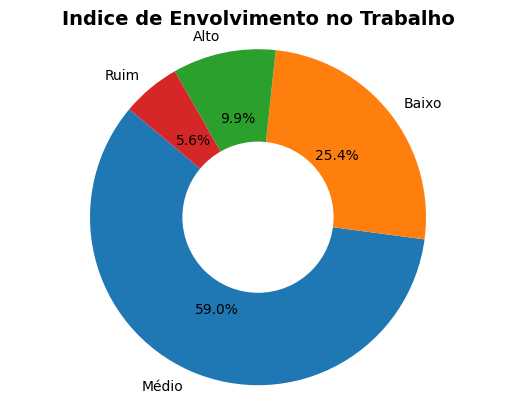

In [ ]:
# Conta a frequência de cada estado civil
nivel_satisfacao = df['Indice_Envolvimento_Trabalho'].value_counts()

# Cria o gráfico de pizza
plt.pie(nivel_satisfacao, labels = nivel_satisfacao.index, autopct='%1.1f%%', startangle=140)

# Adiciona um círculo branco no meio para transformar o gráfico de pizza em um gráfico de rosca
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equaliza os eixos para garantir que o gráfico seja circular
plt.axis('equal')

# Define o título
plt.title('Indice de Envolvimento no Trabalho', fontweight = 'bold', fontsize = 14)

# Mostra o gráfico
plt.show()

**INTERPRETAÇÃO**

A proporção de funcionários com um nível de envolvimento considerado "médio" é a mais alta, abrangendo 59% do total de funcionários. Isso indica que a maioria dos funcionários tem um nível de comprometimento moderado com suas funções na empresa.

Em contraste, os funcionários com um nível de envolvimento considerado "alto" compõem aapenas 9,9% do total. Isso sugere que uma minoria se sente altamente comprometida e engajada em suas funções. Adicionalmente, a proporção de funcionários com níveis de envolvimento "ruim" e "baixo" é de 5,6% e 25,4%, respectivamente.

#### Índice de Envolvimento no Trabalho por Função

A análise de envolvimento por função pode auxiliar a responder as seguintes perguntas:

1. Existem funções específicas que apresentam maior envolvimento no trabalho do que outas?
2. Como o índice de envolvimento varia de acordo com a função?

In [ ]:
print('Tabela de Frequência Cruzada em Porcentagem')
tabela_cruzada = pd.crosstab(df['Funcao'], df['Indice_Envolvimento_Trabalho'], normalize='index') * 100
tabela_cruzada = tabela_cruzada[['Alto', 'Médio', 'Baixo', 'Ruim']]
print(tabela_cruzada.round(2))

Tabela de Frequência Cruzada em Porcentagem
Indice_Envolvimento_Trabalho   Alto  Médio  Baixo  Ruim
Funcao                                                 
Analista de Dados              9.76  56.91  26.02  7.32
Arquiteto de Dados             7.91  57.55  28.78  5.76
Cientista de Dados            10.82  59.40  24.76  5.02
Engenheiro Analitico           9.21  63.16  23.68  3.95
Engenheiro de Dados           12.80  53.60  28.00  5.60
Engenheiro de IA               6.82  63.64  23.30  6.25


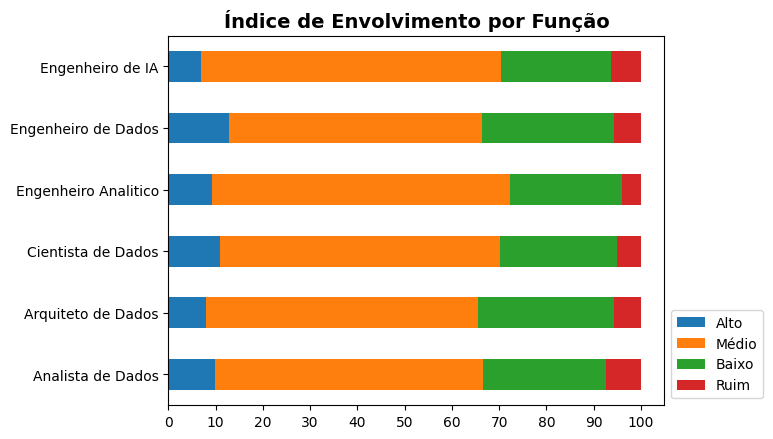

In [ ]:
tabela_cruzada.plot(kind = 'barh', stacked = True)
plt.title('Índice de Envolvimento por Função', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.xticks(range(0, 101, 10))

plt.legend(bbox_to_anchor=(1.0, 0.0), loc='lower left')

plt.show()

**INTERPRETAÇÃO**

O gráfico mostra que os índices de envolvimento é bastante semelhante entre as diferentes funções. O que indica a uniformidade do ambiente de trabalho, como apontada na análise de satisfação dos funcionários com o trabalho.

#### Índice de Envolvimento por Gênero

As seguintes pergunas são respondidas a partir da análise por gênero:

1. Existe uma diferença significativa no índice de envolvimento entre os gêneros masculinos e femininos?
2. O gênero parece influenciar o índice de envolvimento?

In [ ]:
print('Tabela de Frequência Cruzada em Porcentagem')
tabela_cruzada = pd.crosstab(df['Genero'], df['Indice_Envolvimento_Trabalho'], normalize='index') * 100
tabela_cruzada = tabela_cruzada[['Alto', 'Médio', 'Baixo', 'Ruim']]
print(tabela_cruzada.round(2))

Tabela de Frequência Cruzada em Porcentagem
Indice_Envolvimento_Trabalho   Alto  Médio  Baixo  Ruim
Genero                                                 
Feminino                       9.25  58.90  26.87  4.98
Masculino                     10.38  59.07  24.46  6.09


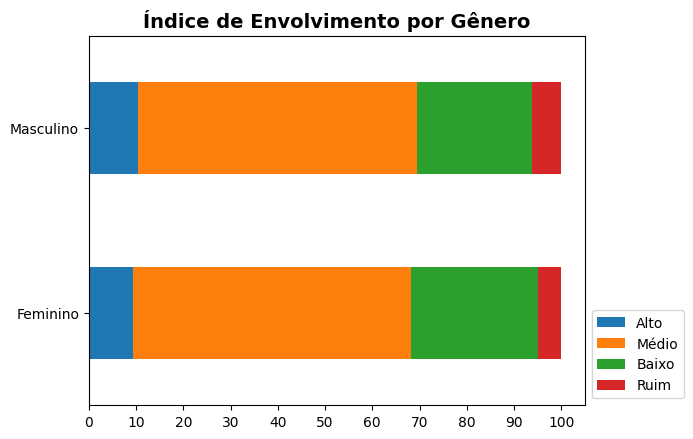

In [ ]:
tabela_cruzada.plot(kind = 'barh', stacked = True)
plt.title('Índice de Envolvimento por Gênero', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.xticks(range(0, 101, 10))

plt.legend(bbox_to_anchor=(1.0, 0.0), loc='lower left')

plt.show()

**INTERPRETAÇÃO**

O índice de envolvimento é semalhante entre os gêneros masculinos e femininos, uma vez que as proporções entre as diferentes classes de índice de envolvimento são bastante semelhantes. Dessa forma, a análise indica que o gênero não influencia no nível de envolvimento dos funcionários.

### Análise da Relação entre Nível de Satisfação no Trabalho e Índice de Envolvimento no Trabalho

Para avaliar a relação entre o Nível de Satisfação no Trabalho e o Índice de Envolvimento no Trabalho, vamos utilizar a Correlação de Spearman. Esse tipo de correlação é utilizado quando temos ao menos uma variável qualitativa ordinal. No presente caso em estudo, ambas as variáveis são qualitativas ordinais.

In [ ]:
#Calculando a correlação de Spearman entre as variáveis, temos:
correlacao_spearman = df['Nivel_Satisfacao_Trabalho'].corr(df['Indice_Envolvimento_Trabalho'], method = 'spearman')
print(f'A correlação de Spearm é: {correlacao_spearman.round(4)}')

A correlação de Spearm é: -0.0286


**INTERPRETAÇÃO:**

A correlação de Spearman apresenta um valor de -0,0286 ao avaliarmos as variáveis de Nível de Satisfação no Trabalho e Índice de Envolvimento no Trabalho. Esse valor, próximo de zero, indica que há ausência de relação significativa entre ambas as variáveis. Dessa forma, a relação entre as duas variáveis é extremamente fraca.

Com base nessa análise, pode-se inferir que o aumento no nível de satisfação do funcionário não resulta necessariamente em um aumento correspondente no seu índice de envolvimento no trabalho. Da mesma forma, uma diminuição no nível de satisfação não implica em uma diminuição proporcional no índice de envolvimento do funcionário.

## 7. Análise de Disponibilidade de Trabalho Extra

Perguntas a serem respondidas:

1. Qual é a proporção de funcionários que estão disponíveis para horas extras em relação aos que não estão?

2. Existe uma diferença na disponibilidade para horas extras entre diferentes funções?

3. Há uma diferença significativa nos salários dos funcionários que estão disponíveis para horas extras em comparação com os que não estão?

### Disponibilidade de Trabalho Extra

A análise de disponibilidade de hora extra pode responder as perguntas abaixo:

1. Qual é a porcentagem de funcionários disponíveis para fazer hora extra?
2. Existe uma diferença notável no nível de satisfação entre funcionários que estão disponíveis para fazer hora extra e os que não estão?

In [ ]:
df['Disponivel_Hora_Extra'] = df['Disponivel_Hora_Extra'].replace({'S':'Sim', 'N':'Não'})

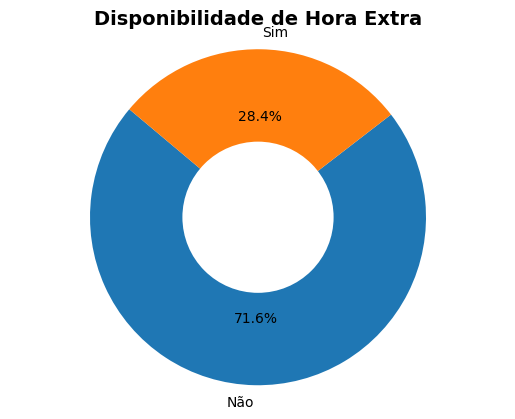

In [ ]:
# Conta a frequência de cada estado civil
nivel_satisfacao = df['Disponivel_Hora_Extra'].value_counts()

# Cria o gráfico de pizza
plt.pie(nivel_satisfacao, labels = nivel_satisfacao.index, autopct='%1.1f%%', startangle=140)

# Adiciona um círculo branco no meio para transformar o gráfico de pizza em um gráfico de rosca
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equaliza os eixos para garantir que o gráfico seja circular
plt.axis('equal')

# Define o título
plt.title('Disponibilidade de Hora Extra', fontweight = 'bold', fontsize = 14)

# Mostra o gráfico
plt.show()

**INTERPRETAÇÃO**

A partir do gráfico acima, podemos visualizar que 28,4% dos funcionários informaram que estão disponíveis para realizar horas extras quando necessário. Isso demonstra o comprometimento e flexibilidade desses profissionais, que estão dispostos a ir além de suas horas regulares para atender às necessidades da empresa.

No entnato, é importante observar que a maioria dos funcionários (71,6%) não estão disponíveis. Esse resultado pode indicar que os funcionários já estão trabalhando no limite de sua capacidade e, desse modo, não podem se comprometer com horas extras. Ou, isso pode ser um indício que a carga de trabalho está bem equilibrada e que a necessidade de horas extras é mínima para esses indivíduos.

In [ ]:
print('Tabela de Frequência Cruzada em Porcentagem')
tabela_cruzada = pd.crosstab(df['Disponivel_Hora_Extra'], df['Nivel_Satisfacao_Trabalho'], normalize='index') * 100
tabela_cruzada = tabela_cruzada[['Alto','Médio','Baixo','Ruim']]
print(tabela_cruzada)

Tabela de Frequência Cruzada em Porcentagem
Nivel_Satisfacao_Trabalho       Alto      Médio      Baixo       Ruim
Disponivel_Hora_Extra                                                
Não                        30.239521  29.940120  19.960080  19.860279
Sim                        34.170854  29.396985  16.331658  20.100503


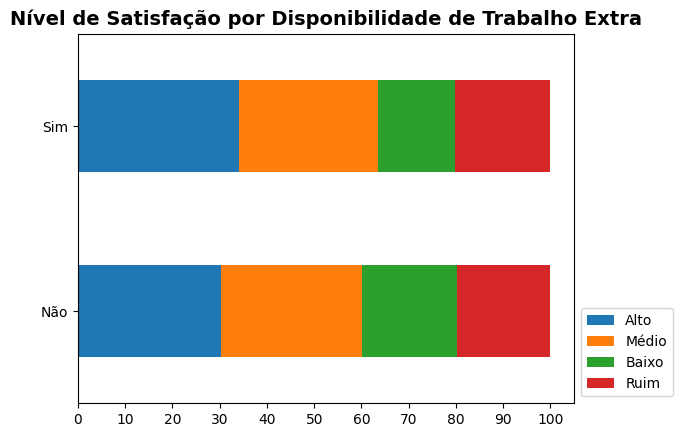

In [ ]:
tabela_cruzada.plot(kind = 'barh', stacked = True)
plt.title('Nível de Satisfação por Disponibilidade de Trabalho Extra', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.xticks(range(0, 101, 10))

plt.legend(bbox_to_anchor=(1.0, 0.0), loc='lower left')

plt.show()

**INTERPRETAÇÃO**

A partir da análise do nível de satisfação por disponibilidade de hora extra, podemos identificar que não há diferenças significativas no nível de satisfação no trabalho entre esses dois grupos.

### Disponibilidade de Trabalho Extra por Função

In [ ]:
print('Tabela de Frequência Cruzada em Porcentagem')
tabela_cruzada = pd.crosstab(df['Funcao'], df['Disponivel_Hora_Extra'], normalize='index') * 100
print(tabela_cruzada.round(2))

Tabela de Frequência Cruzada em Porcentagem
Disponivel_Hora_Extra    Não    Sim
Funcao                             
Analista de Dados      76.42  23.58
Arquiteto de Dados     73.38  26.62
Cientista de Dados     69.12  30.88
Engenheiro Analitico   71.05  28.95
Engenheiro de Dados    72.00  28.00
Engenheiro de IA       72.16  27.84


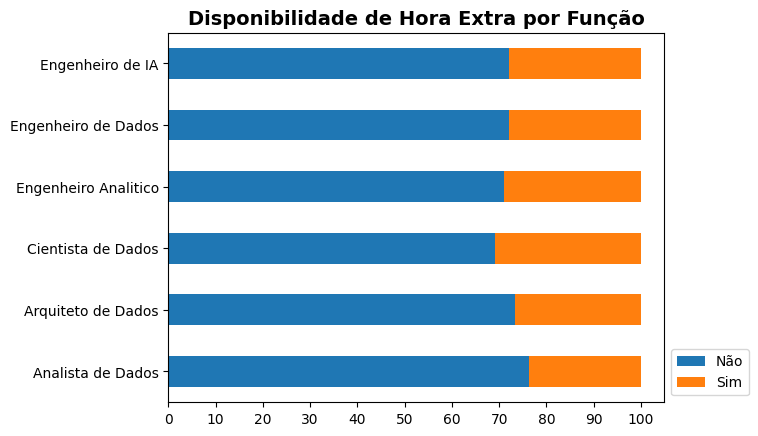

In [ ]:
tabela_cruzada.plot(kind = 'barh', stacked = True)
plt.title('Disponibilidade de Hora Extra por Função', fontweight = 'bold', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('', fontsize = 12)
plt.xticks(range(0, 101, 10))

plt.legend(bbox_to_anchor=(1.0, 0.0), loc='lower left')

plt.show()

**INTERPRETAÇÃO**

O gráfico indica que não existem diferenças significativas nas proporções de funcionários que estão dispostos e não dispostos a azer horas extras entre as diversas funções.

### Distribuição de Salário por Disponibilidade de Hora Extra

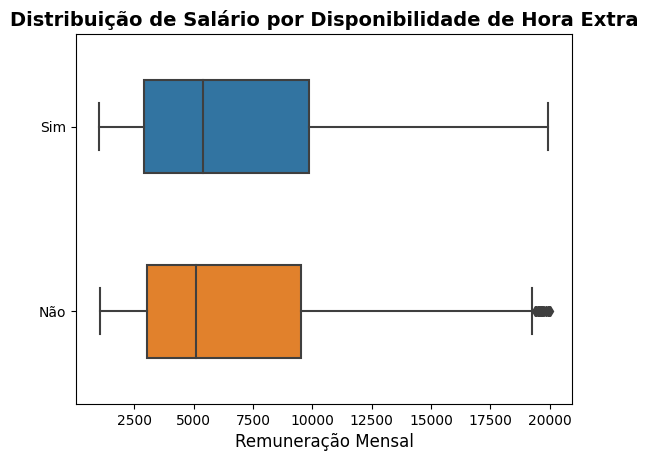

In [ ]:
#Cria o boxplot por função
sns.boxplot(y = df['Disponivel_Hora_Extra'], x = df['Salario_Mensal'], width=0.5)

#Define o título e o rótulo dos eixos
plt.title('Distribuição de Salário por Disponibilidade de Hora Extra', fontweight = 'bold', fontsize = 14)
plt.xlabel('Remuneração Mensal', fontsize = 12)
plt.ylabel('')

plt.show()

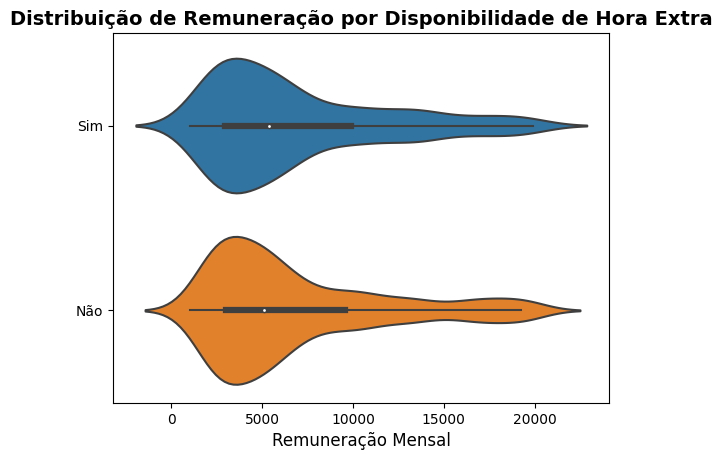

In [ ]:
# Cria o gráfico de violino
sns.violinplot(y = df['Disponivel_Hora_Extra'], x = df['Salario_Mensal'])

# Define o título do gráfico e os rótulos dos eixos
plt.title('Distribuição de Remuneração por Disponibilidade de Hora Extra', fontweight = 'bold', fontsize = 14)
plt.xlabel('Remuneração Mensal', fontsize = 12)
plt.ylabel('')

# Exibe o gráfico
plt.show()

**INTERPRETAÇÃO**

A aanálise comparativa da distribuição de salários entre funcionários que estão disponíveis para fazer horas extras e aqueles que não estão revelou que não diferenças significativas entre os dois grupos. Isso é evidenciado pelos diagramas de caixas (boxplots) e o gráfico de violino, que demonstraram uma sobreposição nas faixas de salário entre esses dois grupos.

A partir desses resultados, podemos interpretar que a disposição para horas extras não está estritamente ligada à remuneração mensal. Ou seja, ter um salário mais alto não necessariamente torna um funcionário mais disposto a aceitar o trabalho extra, e vice-versa. Isso sugere que outros fatores, além da remuneração, podem estar influenciando na disponibilidade.

# Construção dos Dashboards Interativos em Power BI

Para a construção dos dashboards interativos em Power BI as seguintes etapas serão realizadas:

1. **Modelagem do Banco de Dados**

Para a construção do banco de dados responsável pelo armazenamento das informações sobre recursos humanos da organização, será necessário entender os dados e como eles estão relacionados. Nessa etapa, serão definidas quais serão as tabelas do banco de dados, os campos de cada tabela e como as tabelas estarão relacionadas.

2. **Criação do Banco de Dados no PostgreSQL**

Depois de criar os modelos conceituais e lógicos do banco de dados, o banco será implementado a partir do Sistema de Gerenciamento de Banco de Dados Relacional (SGBDR) PostgreSQL. Essa etapa inclui a criação das tabelas de acordo com a modelagem de dados realizada.

3. **Ingestão de Dados**

Após implementação do banco de dados, os dados contidos no arquivo CSV serão inseridos no banco de dados no PostgreSQL com o auxílio da biblioteca Psycopg2. Para isso será criado um script em Python para leitura do arquivo CSV e inserção dos dados nas tabelas do PostgreSQL.

4. **Conexão com Power BI**

Após ingestão dos dados no banco de dados do PostgreSQL, será realizada a conexão do banco de dados com o Power BI. Nessa etapa, o Power BI é conectado com o banco de dados após o fornecimento dos detalhes necessários para a conexão, como o endereço do servidor, nome do banco de dados, nome de usuário e senha.

5. **Importação de Dados**

Após estabelecer a conexão, os dados serão importados para o Power BI, com a seleção das tabelas e campos que devem ser importados.

6. **Transformação de Dados**

Dependendo das análises que deverão ser realizadas, pode ser necessário fazer algumas transformações nos dados, como limpeza de dados, criação de novos campos calculados, etc. O objetivo no presente projeto é realizar toda a parte limpeza e transformação dos dados no nível do banco de dados, criando as tabelas e as relações de acordo com as análises que sejam necessárias.

7. **Criação dos Dashboards**

Finalmente, os dashboards do Power BI poderão ser criados usando os dados importados e modelados.

## 1. **Modelagem de Banco de Dados**

In [ ]:
df.head()

,Id_Funcionario,Idade,Genero,Estado Civil,Departamento,Funcao,Viagem,Valor Diaria,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,...,Numero_Empresas_Anteriores,Disponivel_Hora_Extra,Percentual_Ultimo_Aumento_Salario,Aval_Performance,Anos_Experiencia,Numero_Treinamentos_Ano_Anterior,Anos_na_Empresa,Anos_Funcao_Atual,Anos_Desde_Ultima_Promocao,Anos_com_Gerente_Atual
0,1,41,Feminino,Solteiro,Data Science,Cientista de Dados,Viaja Raramente,1102,Médio,Alto,...,8,Sim,11,3,8,0,6,4,0,5
1,2,49,Masculino,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,279,Baixo,Baixo,...,1,Não,23,4,10,3,10,7,1,7
2,4,37,Masculino,Solteiro,Data Science,Analista de Dados,Viaja Raramente,1373,Baixo,Médio,...,6,Sim,15,3,7,3,0,0,0,0
3,5,33,Feminino,Casado,Data Science,Cientista de Dados,Viaja Frequentemente,1392,Médio,Médio,...,1,Sim,11,3,8,3,8,7,3,0
4,7,27,Masculino,Casado,Data Science,Analista de Dados,Viaja Raramente,591,Médio,Baixo,...,9,Não,12,3,6,3,2,2,2,2


A estrutura do nosso banco de dados será composta por uma única tabela, o que se deve ao tipo específico de dados que devem ser armazenados. O conjunto de dados que temos se refere exclusivamente a uma única entidade: os funcionários que estãoa tuando no Departamento de Data Science de uma empresa fictícia de tecnologia.

Dessa forma, não há necessidade de criação de tabelas adicionais, visto que todoa os dados podem ser organizados de maneira eficiente nesta única tabela. A simplicidade desta estrutura facilita a manipulação e a análise dos dados, ao mesmo tempo que atende às necessidades do projeto.

**Seleção das Variáveis Relevantes**

Com base nas análises realizadas anteriormente e as necessidades do projeto, serão selecionadas apenas as variáveis relevantes para a construção dos dashboards. Essa seleção é feita com base nas necessidades do projeto específico e características da base de dados em análise.

Colunas utilizadas na análise descritiva de dados:

"Id_Funcionario"; "Idade", "Genero"; "Estado_Civil"; "Funcao"; "Indice_Envolvimento_Trabalho"; "Nivel_Satisfacao_Trabalho"; "Salario_Mensal"; "Disponivel_Hora_Extra"; "Anos_Experiencia"; "Anos_na_Empresa".


Dessa forma, serão selecionadas as seguintes variáveis:

1. Idade;
2. Genero;
3. Estado Civil;
4. Função;
5. Indice de Envolvimento no Trabalho;
6. Nível de Satisfação no Trabalho;
7. Salário Mensal;
8. Disponível para Hora Extra;
9. Anos de Experiência;
10. Anos na Empresa.

In [ ]:
df = df[['Id_Funcionario','Idade','Genero','Estado Civil','Funcao','Indice_Envolvimento_Trabalho','Nivel_Satisfacao_Trabalho','Salario_Mensal','Disponivel_Hora_Extra',
         'Anos_Experiencia','Anos_na_Empresa']]

In [ ]:
df.head()

,Id_Funcionario,Idade,Genero,Estado Civil,Funcao,Indice_Envolvimento_Trabalho,Nivel_Satisfacao_Trabalho,Salario_Mensal,Disponivel_Hora_Extra,Anos_Experiencia,Anos_na_Empresa
0,1,41,Feminino,Solteiro,Cientista de Dados,Médio,Alto,15993,Sim,8,6
1,2,49,Masculino,Casado,Cientista de Dados,Baixo,Baixo,15130,Não,10,10
2,4,37,Masculino,Solteiro,Analista de Dados,Baixo,Médio,12090,Sim,7,0
3,5,33,Feminino,Casado,Cientista de Dados,Médio,Médio,12909,Sim,8,8
4,7,27,Masculino,Casado,Analista de Dados,Médio,Baixo,13468,Não,6,2


Dessa forma, foi criada uma nova base de dados com apenas as variáveis relevantes para o projeto de construção dos dashboards.

### Taxonomia dos Dados

Para a criação do modelo lógico do banco de dados, é necessário identificar o tipo de atributo de cada coluna e o tamanho da informação que pode ser adicionada a coluna.

In [ ]:
#Identificando o tipo de variável em cada coluna, temos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Id_Funcionario                1400 non-null   int64 
 1   Idade                         1400 non-null   int64 
 2   Genero                        1400 non-null   object
 3   Estado Civil                  1400 non-null   object
 4   Funcao                        1400 non-null   object
 5   Indice_Envolvimento_Trabalho  1400 non-null   object
 6   Nivel_Satisfacao_Trabalho     1400 non-null   object
 7   Salario_Mensal                1400 non-null   int64 
 8   Disponivel_Hora_Extra         1400 non-null   object
 9   Anos_Experiencia              1400 non-null   int64 
 10  Anos_na_Empresa               1400 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 120.4+ KB


Após isso, devemos investigar o tamanho da informação adicionada em cada campo da tabela.

In [ ]:
#Verificar o tamanho máximo e mínimo da coluna
# Escolhe a coluna para análise
for i in df.columns:
  i = str(i)
  coluna = i
  # Aplica a função len (comprimento) a cada valor na coluna escolhida
  df[coluna] = df[coluna].astype(str) # Converte os valores para string para evitar erros
  comprimentos = df[coluna].apply(len)

  # Encontra o comprimento mínimo e máximo
  minimo = comprimentos.min()
  maximo = comprimentos.max()

  print(f"--------------------------------------------------")
  print(f"Comprimento mínimo na coluna '{coluna}': {minimo}")
  print(f"Comprimento máximo na coluna '{coluna}': {maximo}")

--------------------------------------------------
Comprimento mínimo na coluna 'Id_Funcionario': 1
Comprimento máximo na coluna 'Id_Funcionario': 4
--------------------------------------------------
Comprimento mínimo na coluna 'Idade': 2
Comprimento máximo na coluna 'Idade': 2
--------------------------------------------------
Comprimento mínimo na coluna 'Genero': 8
Comprimento máximo na coluna 'Genero': 9
--------------------------------------------------
Comprimento mínimo na coluna 'Estado Civil': 6
Comprimento máximo na coluna 'Estado Civil': 10
--------------------------------------------------
Comprimento mínimo na coluna 'Funcao': 16
Comprimento máximo na coluna 'Funcao': 20
--------------------------------------------------
Comprimento mínimo na coluna 'Indice_Envolvimento_Trabalho': 4
Comprimento máximo na coluna 'Indice_Envolvimento_Trabalho': 5
--------------------------------------------------
Comprimento mínimo na coluna 'Nivel_Satisfacao_Trabalho': 4
Comprimento máximo

<ipython-input-75-c561ea0b5396>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = df[coluna].astype(str) # Converte os valores para string para evitar erros


Definindo os tipos de dados a serem armazenados no banco de dados, temos:

O atributo "Id_Funcionario" é é uma variável numérica do tipo **INTEGER**;

O atributo "Idade" é do tipo **INTEGER**;

O atributo "Genero" é do tipo **VARCHAR(9)**;

O atributo "Estado Civil" é do tipo **VARCHAR(10)**;

O atributo "Funcao" é do tipo **VARCHAR(20)**;

O atributo "Indice_Envolvimento_Trabalho" é do tipo **VARCHAR(5)**;

O atributo "Nivel_Satisfacao_Trabalho" é do tipo **VARCHAR(5)**;

O atributo "Salario_Mensal" é do tipo **INTEGER**;

O atributo "Disponivel_Hora_Extra" é do tipo **CHAR(3)**;

O atributo "Anos_Experiencia" é do tipo **INTEGER**;

O atributo "Anos_na_Empresa" é do tipo **INTEGER**;

Na figura abaixo temos o modelo lógico do banco de dados com o nome da tabela, os atributos e os tipos de variáveis.

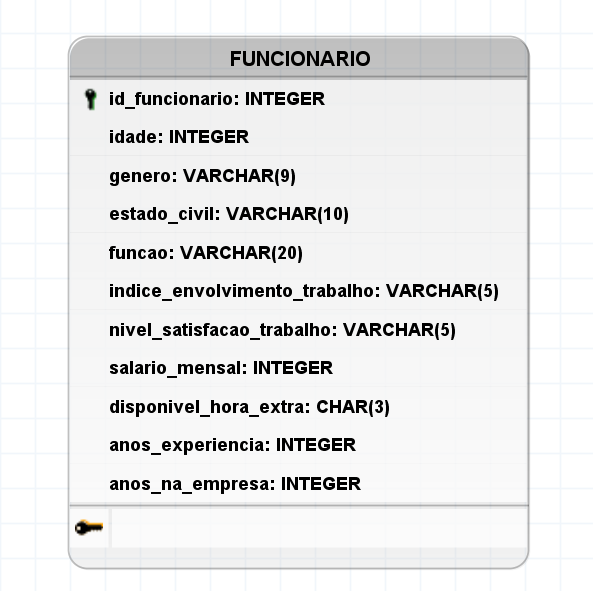

## 2. **Criação do Banco de Dados no PostgreSQL**

O banco de dados foi criado com auxílio do SGBDR PostgreSQL. O código para a implementação da tabela "funcionario" na database RH está descrito na figura abaixo.

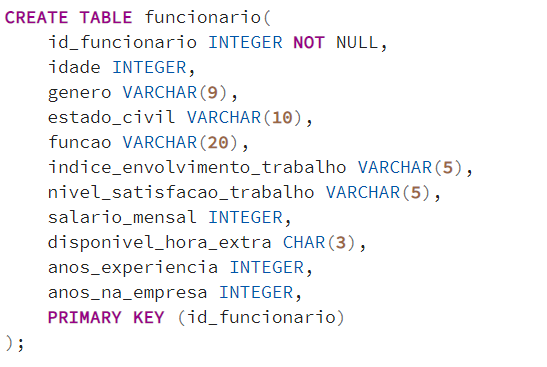

## 3. **Ingestão de Dados no Banco de Dados**

A ingestão dos dados no banco de dados será realizada a partir de um script em Python desenvolvido na IDE Spyder.

In [ ]:
#Exportando a base de dados modificada para um novo arquivo CSV, temos:
df.to_csv('DatasetRH_modificado.csv')

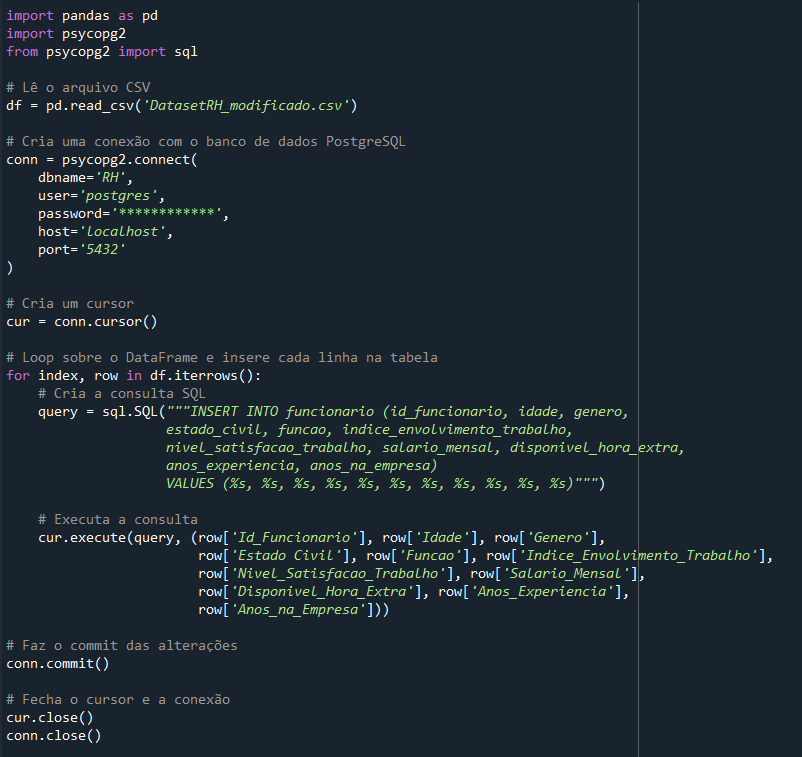

## 4. **Conexão com o Power BI e Importação dos Dados**

Após inserção dos dados no banco de dados, foi realizada a conexão do PostgreSQL com o Power BI para extração dos dados necessários para as visualizações a partir dos dashboards. A conexão é realizada informando o servidor, a base de dados, usuário e senha.

## 5. **Importação de Dados**

Após importação dos dados no Power BI, podemos verificar a estrutura da base de dados. Ou seja, podemos verificar os atributos (colunas) e o tipo dos dados armazenados em cada atributo. Dessa forma, podemos verificar possíveis inconsistências na base de dados.

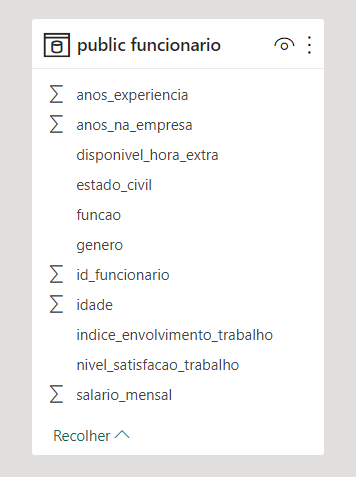

## 7. **Criação dos Dashboards**

Os dashboards desenvolvidos para visualização das informações estratégicas do Departamento de RH são apresentados abaixo:

### Dashboards de Análise de Dados Demográficos

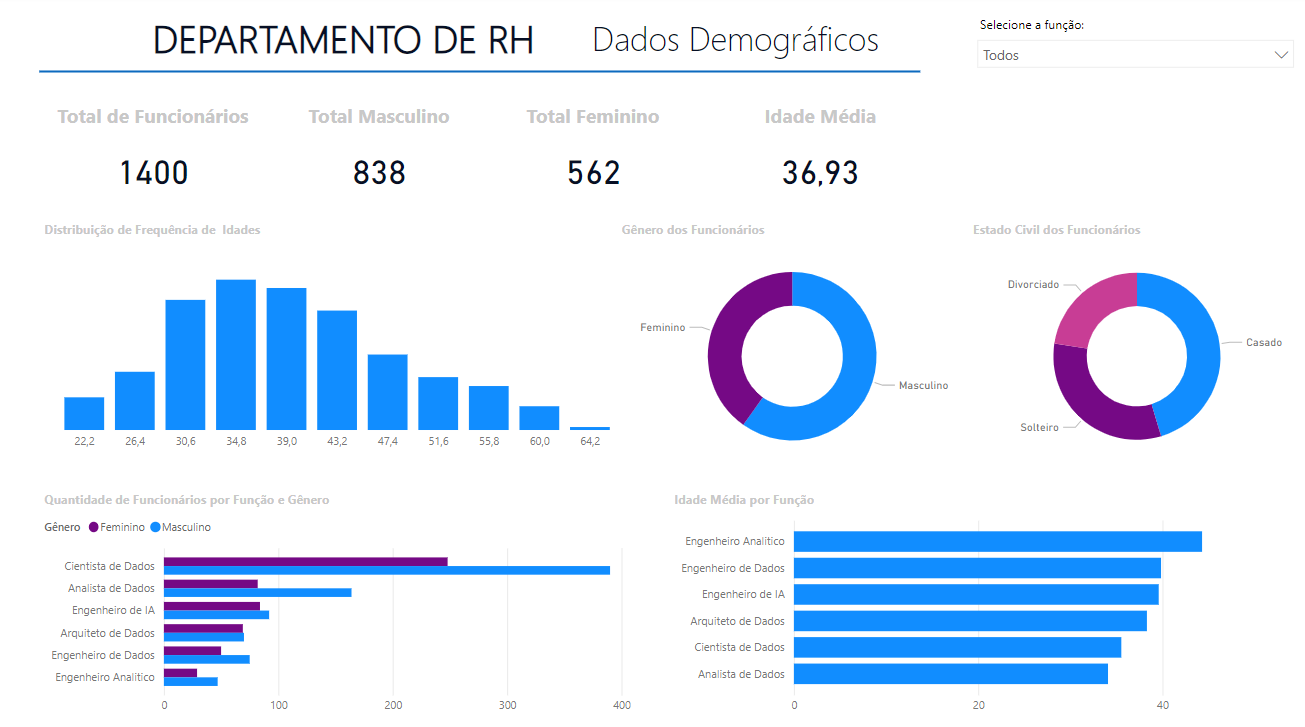

### Análise de Dados de Remuneração Mensal

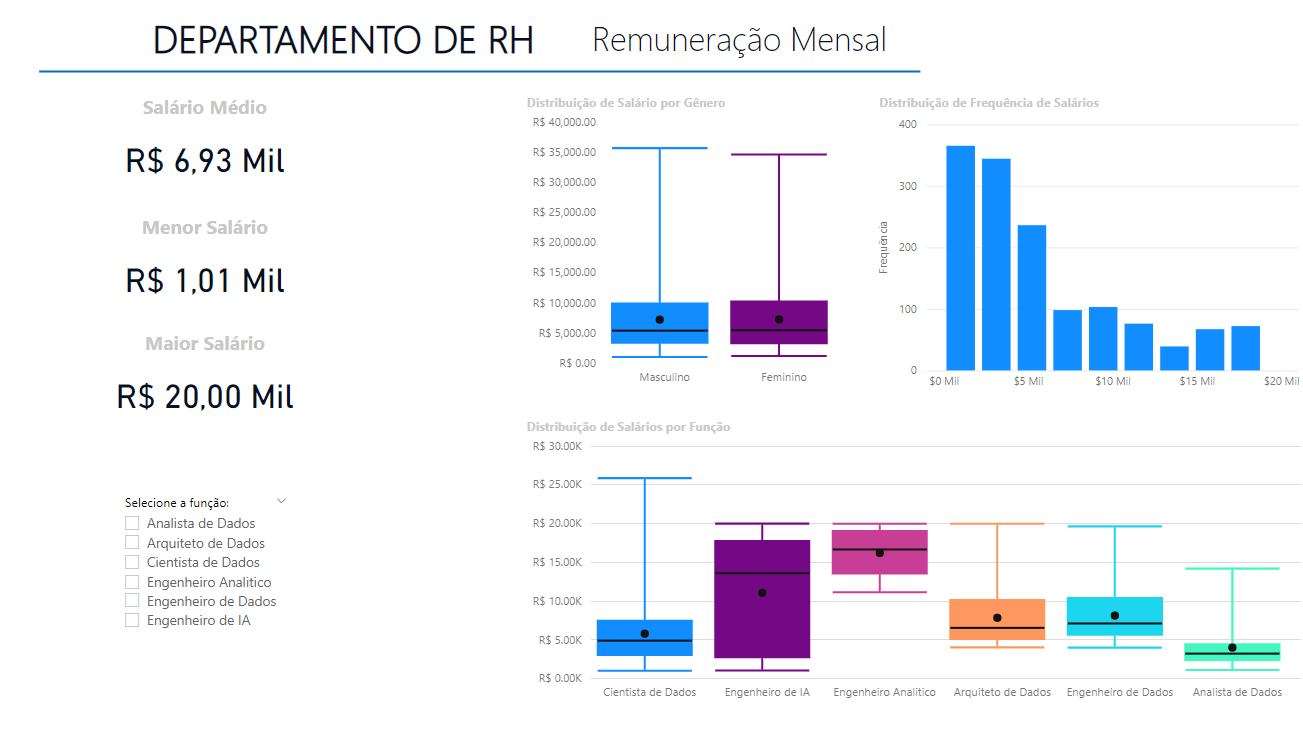

### Análise de Dados Sobre Satisfação no Trabalho

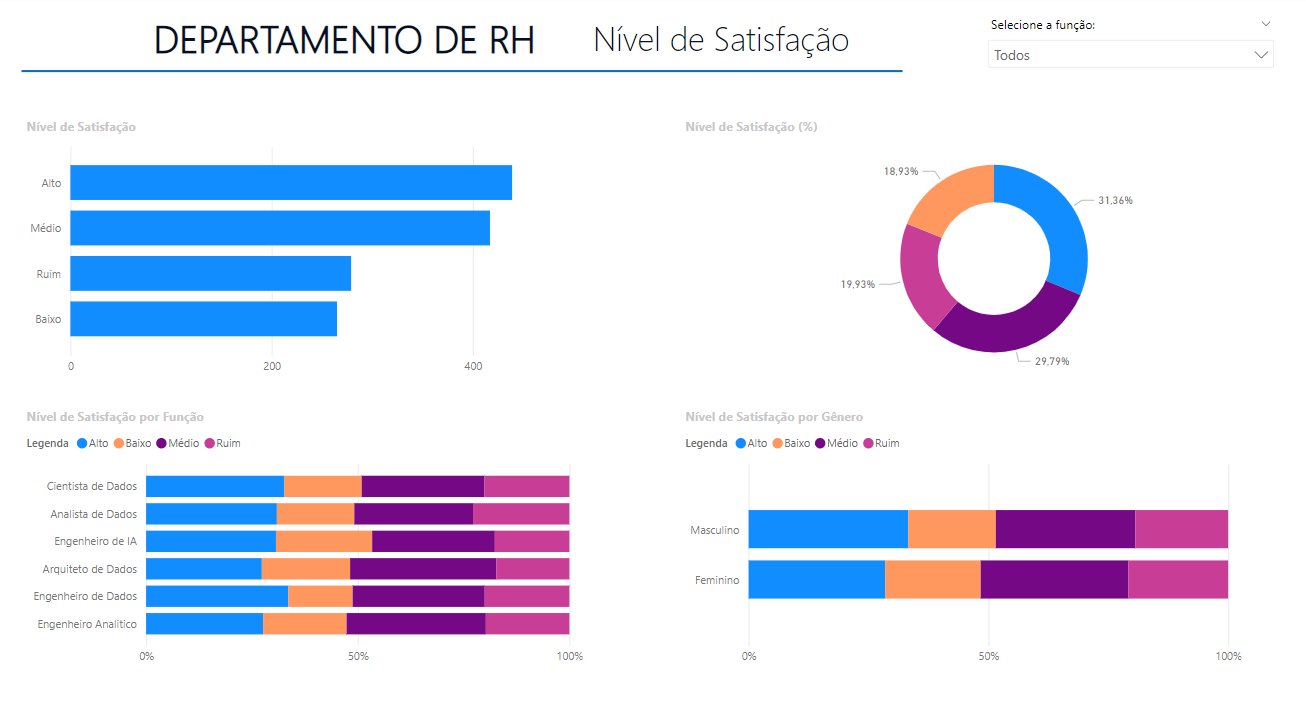

### Análise de Dados Sobre Nível de Envolvimento no Trabalho

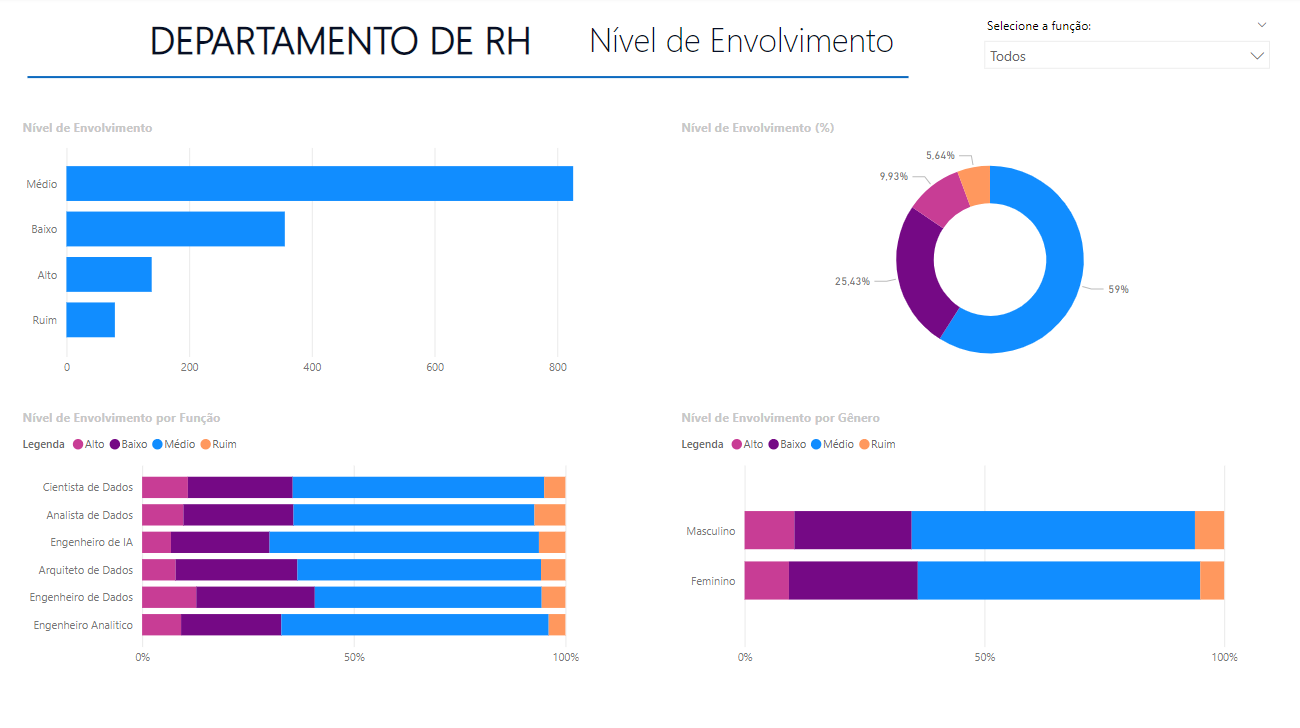